<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Как Вы уже знаете в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать.

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже:

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры.
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:



<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.
<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

Однако сейчас научились иначе бороться с затуханием градиентов с помощью **residual conncection**. Это позволило увеличить число слоев в нейронной сети.

![](https://i.imgur.com/XwcnU5x.png)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:

<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  


Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [2]:
!pip install -q torchvision catalyst

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и *"из коробки"*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [4]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей

train_dataloader = torch.utils.data.DataLoader(
    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()


Размеры обучающей и валидационной выборок:

In [6]:
print(dataset_sizes)

{'train': 244, 'val': 153}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:** <Ваш ответ>

* Посмотрим на картинки из датасета:

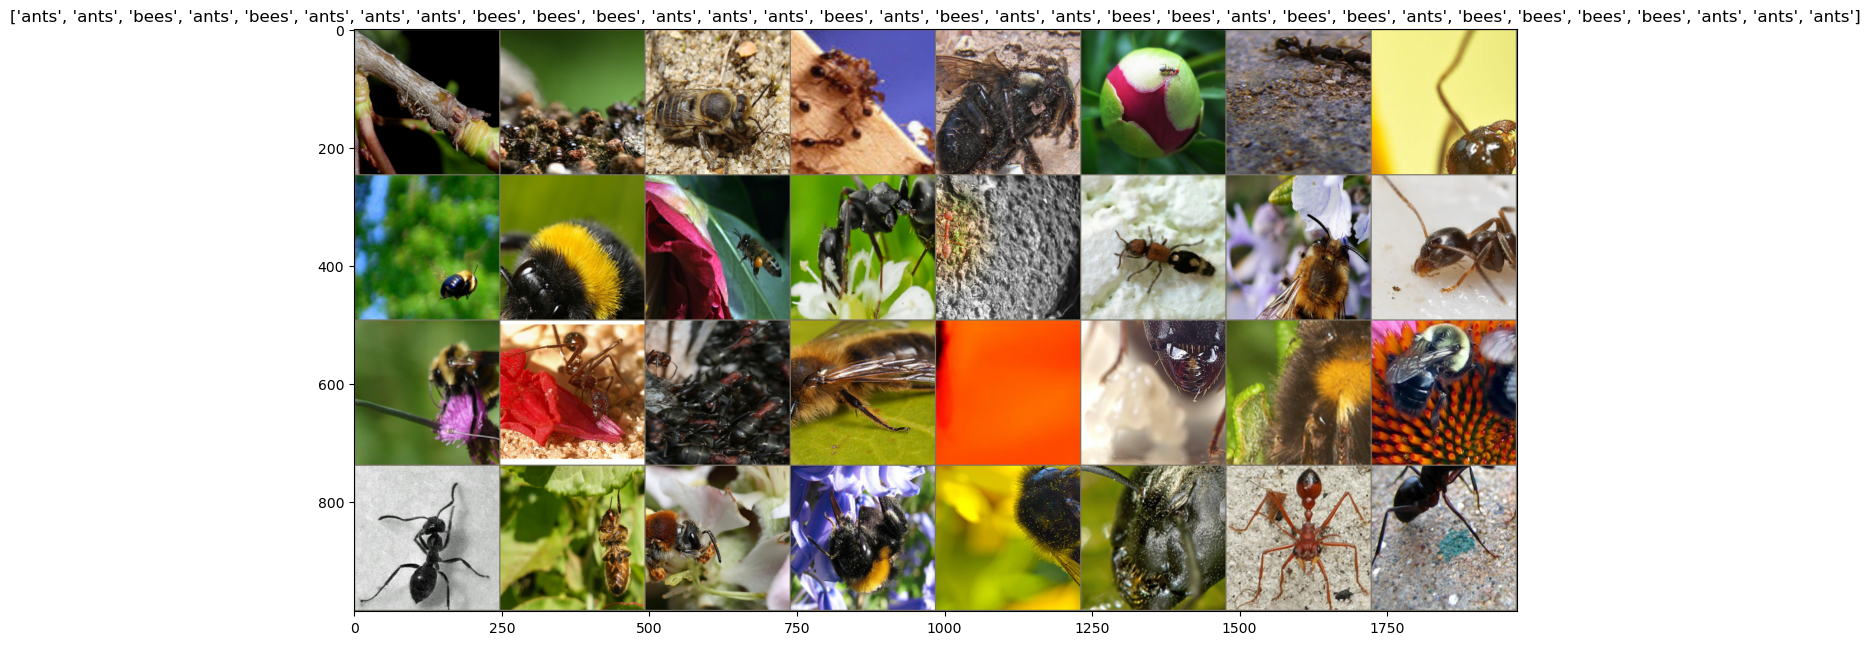

In [3]:
from matplotlib import pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [8]:
image_datasets["train"][0]

(tensor([[[-0.8164, -0.8678, -0.8507,  ..., -0.6109, -0.6109, -0.6281],
          [-0.8507, -0.8849, -0.8678,  ..., -0.6109, -0.6109, -0.6281],
          [-0.8507, -0.8849, -0.8678,  ..., -0.6109, -0.6109, -0.6109],
          ...,
          [-0.6281, -0.6109, -0.5938,  ..., -0.6965, -0.6965, -0.6794],
          [-0.6109, -0.5938, -0.5938,  ..., -0.6794, -0.6794, -0.6794],
          [-0.6109, -0.6109, -0.6109,  ..., -0.6623, -0.6623, -0.6623]],
 
         [[ 0.5203,  0.4678,  0.4853,  ...,  0.7129,  0.7129,  0.7304],
          [ 0.4853,  0.4503,  0.4678,  ...,  0.7129,  0.7129,  0.7304],
          [ 0.4853,  0.4503,  0.4678,  ...,  0.7129,  0.7129,  0.7304],
          ...,
          [ 0.8179,  0.8354,  0.8004,  ...,  0.6954,  0.6954,  0.7129],
          [ 0.8004,  0.8004,  0.7829,  ...,  0.7129,  0.7129,  0.7129],
          [ 0.7479,  0.7479,  0.7479,  ...,  0.7304,  0.7304,  0.7304]],
 
         [[ 2.2217,  2.1694,  2.1868,  ...,  2.2914,  2.2914,  2.3088],
          [ 2.1868,  2.1520,

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [4]:
from catalyst import dl, metrics
from torch.nn import functional as F

class ImgRunner(dl.Runner):

    def predict_batch(self, batch):
        # model inference step
        return self.model(batch[0].to(self.device).view(batch[0].size(0), -1))

    def handle_batch(self, batch):
        # model train/valid step
        x, y = batch
        y_hat = self.model(x)

        self.batch = {
            "features": x,
            "targets": y,
            "logits": y_hat,
        }

    
        
        

### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

### AlexNet

*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [10]:
model = models.alexnet(pretrained=True)

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Посмотрим, что внутри:

In [11]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [12]:
!rm -rf logs

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier[6] = nn.Linear(num_features, 2)
if use_gpu:
    model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [14]:

%reload_ext tensorboard
%tensorboard --logdir "stepik/transfer_learning/logs" 

#write the line above into cmd

In [15]:
runner = ImgRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/alexnet"
)

1/20 * Epoch (train):  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, accuracy=0.281, accuracy01=0.281, loss=0.948, lr=1.000e-04, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k: runner.engine.sync_tensor(torch.tensor(v, device=runner.device), "mean")
1/20 * Epoch (train): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s, accuracy=0.750, accuracy01=0.750, loss=0.620, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.7172130942344666 | accuracy/std: 0.18689255422081477 | accuracy01: 0.7172130942344666 | accuracy01/std: 0.18689255422081477 | loss: 0.5894792675971985 | loss/mean: 0.5894792675971985 | loss/std: 0.18172715621209815 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it, accuracy=0.800, accuracy01=0.800, loss=0.545, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.8823529481887817 | accuracy/std: 0.03651474445535219 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.03651474445535219 | loss: 0.31766703724861145 | loss/mean: 0.31766703724861145 | loss/std: 0.10073967898740566 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s, accuracy=0.850, accuracy01=0.850, loss=0.390, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.8524590134620667 | accuracy/std: 0.054895133391188636 | accuracy01: 0.8524590134620667 | accuracy01/std: 0.054895133391188636 | loss: 0.35293376445770264 | loss/mean: 0.35293376445770264 | loss/std: 0.1209375601212728 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s, accuracy=0.840, accuracy01=0.840, loss=0.371, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.8954248428344727 | accuracy/std: 0.024575000441671397 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.024575000441671397 | loss: 0.30008020997047424 | loss/mean: 0.30008020997047424 | loss/std: 0.03122490790411557 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s, accuracy=0.950, accuracy01=0.950, loss=0.162, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.8975409865379333 | accuracy/std: 0.05024731285526634 | accuracy01: 0.8975409865379333 | accuracy01/std: 0.05024731285526634 | loss: 0.28482913970947266 | loss/mean: 0.28482913970947266 | loss/std: 0.07420140481327496 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s, accuracy=0.920, accuracy01=0.920, loss=0.135, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.8627451062202454 | accuracy/std: 0.025386413166748705 | accuracy01: 0.8627451062202454 | accuracy01/std: 0.025386413166748705 | loss: 0.3699395954608917 | loss/mean: 0.3699395954608917 | loss/std: 0.10420082995524117 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s, accuracy=0.950, accuracy01=0.950, loss=0.178, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9016393423080444 | accuracy/std: 0.03413205046989609 | accuracy01: 0.9016393423080444 | accuracy01/std: 0.03413205046989609 | loss: 0.25875842571258545 | loss/mean: 0.25875842571258545 | loss/std: 0.09129132770609051 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s, accuracy=0.640, accuracy01=0.640, loss=0.911, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.843137264251709 | accuracy/std: 0.090069664665971 | accuracy01: 0.843137264251709 | accuracy01/std: 0.090069664665971 | loss: 0.4027183949947357 | loss/mean: 0.4027183949947357 | loss/std: 0.2254729111878367 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s, accuracy=0.950, accuracy01=0.950, loss=0.153, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9057376980781555 | accuracy/std: 0.07709934780615971 | accuracy01: 0.9057376980781555 | accuracy01/std: 0.07709934780615971 | loss: 0.22114482522010803 | loss/mean: 0.22114482522010803 | loss/std: 0.10110075308429489 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s, accuracy=0.920, accuracy01=0.920, loss=0.133, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.8496732115745544 | accuracy/std: 0.0311824015425264 | accuracy01: 0.8496732115745544 | accuracy01/std: 0.0311824015425264 | loss: 0.3629656136035919 | loss/mean: 0.3629656136035919 | loss/std: 0.10188460359014306 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s, accuracy=0.950, accuracy01=0.950, loss=0.111, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9303278923034668 | accuracy/std: 0.03878683758707034 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.03878683758707034 | loss: 0.15089544653892517 | loss/mean: 0.15089544653892517 | loss/std: 0.058714505112394115 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s, accuracy=0.760, accuracy01=0.760, loss=0.645, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.3178343176841736 | loss/mean: 0.3178343176841736 | loss/std: 0.14495726157088756 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s, accuracy=0.950, accuracy01=0.950, loss=0.202, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9672130942344666 | accuracy/std: 0.03248645974608371 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.03248645974608371 | loss: 0.12487095594406128 | loss/mean: 0.12487095594406128 | loss/std: 0.0767836584031256 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s, accuracy=0.880, accuracy01=0.880, loss=0.296, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.8954248428344727 | accuracy/std: 0.006839268052212937 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.006839268052212937 | loss: 0.3273451030254364 | loss/mean: 0.3273451030254364 | loss/std: 0.013751576294548044 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s, accuracy=1.000, accuracy01=1.000, loss=0.042, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9426229596138 | accuracy/std: 0.028452639985087992 | accuracy01: 0.9426229596138 | accuracy01/std: 0.028452639985087992 | loss: 0.14807157218456268 | loss/mean: 0.14807157218456268 | loss/std: 0.0703190637345983 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s, accuracy=0.880, accuracy01=0.880, loss=0.412, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.8954248428344727 | accuracy/std: 0.006839268052212937 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.006839268052212937 | loss: 0.3238798677921295 | loss/mean: 0.3238798677921295 | loss/std: 0.039157457264354885 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s, accuracy=0.900, accuracy01=0.900, loss=0.205, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.938524603843689 | accuracy/std: 0.042266974204842336 | accuracy01: 0.938524603843689 | accuracy01/std: 0.042266974204842336 | loss: 0.12908095121383667 | loss/mean: 0.12908095121383667 | loss/std: 0.0613428082627469 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s, accuracy=0.920, accuracy01=0.920, loss=0.391, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.8954248428344727 | accuracy/std: 0.01089644222730451 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.01089644222730451 | loss: 0.34493741393089294 | loss/mean: 0.34493741393089294 | loss/std: 0.020553810195571447 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s, accuracy=1.000, accuracy01=1.000, loss=0.004, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.9877049326896667 | accuracy/std: 0.015297428991111856 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.015297428991111856 | loss: 0.06332124024629593 | loss/mean: 0.06332124024629593 | loss/std: 0.024911362766183807 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s, accuracy=0.840, accuracy01=0.840, loss=0.652, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.8954248428344727 | accuracy/std: 0.024575000441671397 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.024575000441671397 | loss: 0.3516506552696228 | loss/mean: 0.3516506552696228 | loss/std: 0.13333370076860132 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s, accuracy=1.000, accuracy01=1.000, loss=0.035, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9467213153839111 | accuracy/std: 0.04062915944798645 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.04062915944798645 | loss: 0.12465246021747589 | loss/mean: 0.12465246021747589 | loss/std: 0.07439694092932254 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s, accuracy=0.880, accuracy01=0.880, loss=0.396, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.38390788435935974 | loss/mean: 0.38390788435935974 | loss/std: 0.005542663726670806 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s, accuracy=1.000, accuracy01=1.000, loss=0.025, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9631147384643555 | accuracy/std: 0.03282217877108174 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.03282217877108174 | loss: 0.07331553101539612 | loss/mean: 0.07331553101539612 | loss/std: 0.03589389915971576 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s, accuracy=0.800, accuracy01=0.800, loss=0.738, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.8954248428344727 | accuracy/std: 0.042310732831129856 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.042310732831129856 | loss: 0.37109053134918213 | loss/mean: 0.37109053134918213 | loss/std: 0.16270372833670574 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s, accuracy=1.000, accuracy01=1.000, loss=0.028, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9672130942344666 | accuracy/std: 0.06170435678479649 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.06170435678479649 | loss: 0.08521990478038788 | loss/mean: 0.08521990478038788 | loss/std: 0.09227493940035886 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s, accuracy=0.880, accuracy01=0.880, loss=0.771, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.38520729541778564 | loss/mean: 0.38520729541778564 | loss/std: 0.17099620542662525 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s, accuracy=1.000, accuracy01=1.000, loss=0.017, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029075630616662376 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029075630616662376 | loss: 0.06039316952228546 | loss/mean: 0.06039316952228546 | loss/std: 0.03519347443643529 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s, accuracy=0.880, accuracy01=0.880, loss=0.487, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.8758170008659363 | accuracy/std: 0.0018547145114535671 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.0018547145114535671 | loss: 0.47063642740249634 | loss/mean: 0.47063642740249634 | loss/std: 0.007182502776431589 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s, accuracy=0.950, accuracy01=0.950, loss=0.121, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9754098057746887 | accuracy/std: 0.022333888744687495 | accuracy01: 0.9754098057746887 | accuracy01/std: 0.022333888744687495 | loss: 0.08044689148664474 | loss/mean: 0.08044689148664474 | loss/std: 0.05907478852521508 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s, accuracy=0.720, accuracy01=0.720, loss=1.291, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9019607901573181 | accuracy/std: 0.08068016968799462 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.08068016968799462 | loss: 0.4731152355670929 | loss/mean: 0.4731152355670929 | loss/std: 0.3625707409734006 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s, accuracy=0.950, accuracy01=0.950, loss=0.066, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9713114500045776 | accuracy/std: 0.02579440220886279 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.02579440220886279 | loss: 0.10492861270904541 | loss/mean: 0.10492861270904541 | loss/std: 0.13521746282365785 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s, accuracy=0.920, accuracy01=0.920, loss=0.213, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.8758170008659363 | accuracy/std: 0.019590424790971037 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.019590424790971037 | loss: 0.44152119755744934 | loss/mean: 0.44152119755744934 | loss/std: 0.10140366815332238 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s, accuracy=0.900, accuracy01=0.900, loss=0.461, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9754098653793335 | accuracy/std: 0.038754206383606535 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.038754206383606535 | loss: 0.08689144998788834 | loss/mean: 0.08689144998788834 | loss/std: 0.11956985694108137 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s, accuracy=0.800, accuracy01=0.800, loss=1.047, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.9019607901573181 | accuracy/std: 0.045208727019018714 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.045208727019018714 | loss: 0.388424277305603 | loss/mean: 0.388424277305603 | loss/std: 0.2918003463402279 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s, accuracy=1.000, accuracy01=1.000, loss=0.058, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9795082211494446 | accuracy/std: 0.02187609925342048 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.02187609925342048 | loss: 0.07881627976894379 | loss/mean: 0.07881627976894379 | loss/std: 0.07064283651829724 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s, accuracy=0.840, accuracy01=0.840, loss=0.379, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.8627451062202454 | accuracy/std: 0.010085029502227198 | accuracy01: 0.8627451062202454 | accuracy01/std: 0.010085029502227198 | loss: 0.5034071207046509 | loss/mean: 0.5034071207046509 | loss/std: 0.05498638412134333 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s, accuracy=0.950, accuracy01=0.950, loss=0.059, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9754098057746887 | accuracy/std: 0.0223338887446875 | accuracy01: 0.9754098057746887 | accuracy01/std: 0.0223338887446875 | loss: 0.08464840799570084 | loss/mean: 0.08464840799570084 | loss/std: 0.062000770381794364 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s, accuracy=0.880, accuracy01=0.880, loss=0.310, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.8496732115745544 | accuracy/std: 0.01344669126300893 | accuracy01: 0.8496732115745544 | accuracy01/std: 0.01344669126300893 | loss: 0.5302801728248596 | loss/mean: 0.5302801728248596 | loss/std: 0.0976973289946712 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s, accuracy=1.000, accuracy01=1.000, loss=0.037, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9754098653793335 | accuracy/std: 0.030594857982223726 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.030594857982223726 | loss: 0.075637586414814 | loss/mean: 0.075637586414814 | loss/std: 0.07762424226809218 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s, accuracy=0.800, accuracy01=0.800, loss=0.842, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9084967374801636 | accuracy/std: 0.04810672120690755 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.04810672120690755 | loss: 0.3570340573787689 | loss/mean: 0.3570340573787689 | loss/std: 0.214947042626808 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet\checkpoints/train.13.pth	0.9216


* **Feature Extractor** способ:

In [16]:
model_extractor = models.alexnet(pretrained=True)

Помним, что по-умолчанию все слои нейросети обучаются заново:

In [17]:
for param in model_extractor.parameters():
    print(param.requires_grad)
    break

True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [18]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier[6] = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.classifier[6].parameters(), lr=1e-4)

In [19]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/alexnet"
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.06it/s, accuracy=0.450, accuracy01=0.450, loss=0.782, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.4795081913471222 | accuracy/std: 0.07718133643192723 | accuracy01: 0.4795081913471222 | accuracy01/std: 0.07718133643192723 | loss: 0.7900487780570984 | loss/mean: 0.7900487780570984 | loss/std: 0.06923355862415569 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s, accuracy=0.520, accuracy01=0.520, loss=0.807, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.5882353186607361 | accuracy/std: 0.030255066396740606 | accuracy01: 0.5882353186607361 | accuracy01/std: 0.030255066396740606 | loss: 0.6962142586708069 | loss/mean: 0.6962142586708069 | loss/std: 0.04892191473189734 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.82it/s, accuracy=0.900, accuracy01=0.900, loss=0.468, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.6598360538482666 | accuracy/std: 0.1210404786589707 | accuracy01: 0.6598360538482666 | accuracy01/std: 0.1210404786589707 | loss: 0.6024848818778992 | loss/mean: 0.6024848818778992 | loss/std: 0.07611620437448391 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s, accuracy=0.640, accuracy01=0.640, loss=0.629, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.7058823704719543 | accuracy/std: 0.02921178672030534 | accuracy01: 0.7058823704719543 | accuracy01/std: 0.02921178672030534 | loss: 0.5530163645744324 | loss/mean: 0.5530163645744324 | loss/std: 0.03358723349621676 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s, accuracy=0.850, accuracy01=0.850, loss=0.446, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.7622950673103333 | accuracy/std: 0.08194811260441022 | accuracy01: 0.7622950673103333 | accuracy01/std: 0.08194811260441022 | loss: 0.5268789529800415 | loss/mean: 0.5268789529800415 | loss/std: 0.0782103516980942 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.600, accuracy01=0.600, loss=0.561, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.7777777910232544 | accuracy/std: 0.07882545517654105 | accuracy01: 0.7777777910232544 | accuracy01/std: 0.07882545517654105 | loss: 0.463339239358902 | loss/mean: 0.463339239358902 | loss/std: 0.04315798577058223 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.57it/s, accuracy=0.900, accuracy01=0.900, loss=0.393, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.811475396156311 | accuracy/std: 0.07765516735446343 | accuracy01: 0.811475396156311 | accuracy01/std: 0.07765516735446343 | loss: 0.42523470520973206 | loss/mean: 0.42523470520973206 | loss/std: 0.04737642645192499 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s, accuracy=0.560, accuracy01=0.560, loss=0.543, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.8104575276374817 | accuracy/std: 0.1110511363955027 | accuracy01: 0.8104575276374817 | accuracy01/std: 0.1110511363955027 | loss: 0.4064394235610962 | loss/mean: 0.4064394235610962 | loss/std: 0.060722133962842886 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.93it/s, accuracy=0.850, accuracy01=0.850, loss=0.332, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.8483606576919556 | accuracy/std: 0.07069159424825594 | accuracy01: 0.8483606576919556 | accuracy01/std: 0.07069159424825594 | loss: 0.38948768377304077 | loss/mean: 0.38948768377304077 | loss/std: 0.09183589428558625 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s, accuracy=0.600, accuracy01=0.600, loss=0.551, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.843137264251709 | accuracy/std: 0.10780539705542944 | accuracy01: 0.843137264251709 | accuracy01/std: 0.10780539705542944 | loss: 0.37175044417381287 | loss/mean: 0.37175044417381287 | loss/std: 0.07938261463498911 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.78it/s, accuracy=0.900, accuracy01=0.900, loss=0.409, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.8524590134620667 | accuracy/std: 0.04868749166191176 | accuracy01: 0.8524590134620667 | accuracy01/std: 0.04868749166191176 | loss: 0.36805275082588196 | loss/mean: 0.36805275082588196 | loss/std: 0.06325079207663181 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s, accuracy=0.640, accuracy01=0.640, loss=0.528, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.8496732115745544 | accuracy/std: 0.09296765885385982 | accuracy01: 0.8496732115745544 | accuracy01/std: 0.09296765885385982 | loss: 0.3484739363193512 | loss/mean: 0.3484739363193512 | loss/std: 0.07950938198176234 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.97it/s, accuracy=0.800, accuracy01=0.800, loss=0.471, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.8729507923126221 | accuracy/std: 0.07398769153142856 | accuracy01: 0.8729507923126221 | accuracy01/std: 0.07398769153142856 | loss: 0.320875883102417 | loss/mean: 0.320875883102417 | loss/std: 0.08427615322523092 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s, accuracy=0.720, accuracy01=0.720, loss=0.503, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.8692810535430908 | accuracy/std: 0.06619019874855042 | accuracy01: 0.8692810535430908 | accuracy01/std: 0.06619019874855042 | loss: 0.3292359411716461 | loss/mean: 0.3292359411716461 | loss/std: 0.07690179081405192 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s, accuracy=0.850, accuracy01=0.850, loss=0.337, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.8893442749977112 | accuracy/std: 0.029557438289073562 | accuracy01: 0.8893442749977112 | accuracy01/std: 0.029557438289073562 | loss: 0.29370248317718506 | loss/mean: 0.29370248317718506 | loss/std: 0.04550162906763121 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s, accuracy=0.720, accuracy01=0.720, loss=0.501, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.8758170008659363 | accuracy/std: 0.06908819293643925 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.06908819293643925 | loss: 0.3145865797996521 | loss/mean: 0.3145865797996521 | loss/std: 0.08254320859223797 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.03it/s, accuracy=0.900, accuracy01=0.900, loss=0.301, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.8934426307678223 | accuracy/std: 0.0315581771277834 | accuracy01: 0.8934426307678223 | accuracy01/std: 0.0315581771277834 | loss: 0.2873612940311432 | loss/mean: 0.2873612940311432 | loss/std: 0.04376240300822777 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s, accuracy=0.720, accuracy01=0.720, loss=0.463, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.8758170008659363 | accuracy/std: 0.06908819293643925 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.06908819293643925 | loss: 0.29960548877716064 | loss/mean: 0.29960548877716064 | loss/std: 0.07255078657792559 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.65it/s, accuracy=0.950, accuracy01=0.950, loss=0.149, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.8975409865379333 | accuracy/std: 0.05961207120656986 | accuracy01: 0.8975409865379333 | accuracy01/std: 0.05961207120656986 | loss: 0.29386019706726074 | loss/mean: 0.29386019706726074 | loss/std: 0.06873499764543839 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s, accuracy=0.760, accuracy01=0.760, loss=0.421, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.8823529481887817 | accuracy/std: 0.05425045473486963 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.05425045473486963 | loss: 0.28953057527542114 | loss/mean: 0.28953057527542114 | loss/std: 0.058419118287497435 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s, accuracy=0.900, accuracy01=0.900, loss=0.413, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.8975409865379333 | accuracy/std: 0.026432193994222 | accuracy01: 0.8975409865379333 | accuracy01/std: 0.026432193994222 | loss: 0.27797597646713257 | loss/mean: 0.27797597646713257 | loss/std: 0.0484307327069548 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s, accuracy=0.760, accuracy01=0.760, loss=0.410, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.2815527617931366 | loss/mean: 0.2815527617931366 | loss/std: 0.0569517036126928 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s, accuracy=1.000, accuracy01=1.000, loss=0.206, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9221311211585999 | accuracy/std: 0.052772584667655685 | accuracy01: 0.9221311211585999 | accuracy01/std: 0.052772584667655685 | loss: 0.23795518279075623 | loss/mean: 0.23795518279075623 | loss/std: 0.046176419006739786 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s, accuracy=0.760, accuracy01=0.760, loss=0.417, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.275406152009964 | loss/mean: 0.275406152009964 | loss/std: 0.06279113802255253 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s, accuracy=0.850, accuracy01=0.850, loss=0.238, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.881147563457489 | accuracy/std: 0.062221516491367826 | accuracy01: 0.881147563457489 | accuracy01/std: 0.062221516491367826 | loss: 0.2896273732185364 | loss/mean: 0.2896273732185364 | loss/std: 0.08461561613137902 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s, accuracy=0.760, accuracy01=0.760, loss=0.410, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.270302414894104 | loss/mean: 0.270302414894104 | loss/std: 0.061862653159834295 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s, accuracy=0.950, accuracy01=0.950, loss=0.186, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9303278923034668 | accuracy/std: 0.06384696728045211 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.06384696728045211 | loss: 0.21950499713420868 | loss/mean: 0.21950499713420868 | loss/std: 0.0685371772741163 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s, accuracy=0.800, accuracy01=0.800, loss=0.417, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.8888888955116272 | accuracy/std: 0.03941273864324102 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.03941273864324102 | loss: 0.26587674021720886 | loss/mean: 0.26587674021720886 | loss/std: 0.06693051143082909 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.13it/s, accuracy=0.950, accuracy01=0.950, loss=0.172, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9344262480735779 | accuracy/std: 0.025423949752314663 | accuracy01: 0.9344262480735779 | accuracy01/std: 0.025423949752314663 | loss: 0.2061895728111267 | loss/mean: 0.2061895728111267 | loss/std: 0.029302918342569075 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s, accuracy=0.800, accuracy01=0.800, loss=0.420, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9019607901573181 | accuracy/std: 0.045208727019018714 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.045208727019018714 | loss: 0.2612570822238922 | loss/mean: 0.2612570822238922 | loss/std: 0.07036780577231624 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.08it/s, accuracy=0.850, accuracy01=0.850, loss=0.396, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9180327653884888 | accuracy/std: 0.033908960226421966 | accuracy01: 0.9180327653884888 | accuracy01/std: 0.033908960226421966 | loss: 0.24068987369537354 | loss/mean: 0.24068987369537354 | loss/std: 0.06767722270130123 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s, accuracy=0.840, accuracy01=0.840, loss=0.426, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.915032684803009 | accuracy/std: 0.033268983005337927 | accuracy01: 0.915032684803009 | accuracy01/std: 0.033268983005337927 | loss: 0.25854188203811646 | loss/mean: 0.25854188203811646 | loss/std: 0.07419070853996515 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.13it/s, accuracy=0.800, accuracy01=0.800, loss=0.398, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9139344096183777 | accuracy/std: 0.0516745472481219 | accuracy01: 0.9139344096183777 | accuracy01/std: 0.0516745472481219 | loss: 0.23004119098186493 | loss/mean: 0.23004119098186493 | loss/std: 0.09423976902183802 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s, accuracy=0.840, accuracy01=0.840, loss=0.424, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.2565156817436218 | loss/mean: 0.2565156817436218 | loss/std: 0.07406100057103777 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s, accuracy=0.900, accuracy01=0.900, loss=0.301, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9057376980781555 | accuracy/std: 0.027830853360864265 | accuracy01: 0.9057376980781555 | accuracy01/std: 0.027830853360864265 | loss: 0.2363506555557251 | loss/mean: 0.2363506555557251 | loss/std: 0.031154751191029163 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s, accuracy=0.840, accuracy01=0.840, loss=0.425, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.25419169664382935 | loss/mean: 0.25419169664382935 | loss/std: 0.07564952797520268 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.17it/s, accuracy=0.900, accuracy01=0.900, loss=0.228, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9139344096183777 | accuracy/std: 0.031188589430164525 | accuracy01: 0.9139344096183777 | accuracy01/std: 0.031188589430164525 | loss: 0.2245011329650879 | loss/mean: 0.2245011329650879 | loss/std: 0.04805694213616518 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s, accuracy=0.840, accuracy01=0.840, loss=0.411, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.2512616813182831 | loss/mean: 0.2512616813182831 | loss/std: 0.0709072054206491 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s, accuracy=0.850, accuracy01=0.850, loss=0.272, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9139344096183777 | accuracy/std: 0.03685824752878603 | accuracy01: 0.9139344096183777 | accuracy01/std: 0.03685824752878603 | loss: 0.23252016305923462 | loss/mean: 0.23252016305923462 | loss/std: 0.050959826900901534 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s, accuracy=0.840, accuracy01=0.840, loss=0.407, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.24939878284931183 | loss/mean: 0.24939878284931183 | loss/std: 0.06994289692601156 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet\checkpoints/train.16.pth	0.9150


* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [20]:
model_mixed = models.alexnet(pretrained=True)

In [21]:
model_mixed

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
from itertools import chain

layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = torch.optim.Adam(
    chain(
        list(model_mixed.features.parameters())[-layers_to_unfreeze:],
        model_mixed.classifier.parameters()
    ),
    lr=1e-4,
)

In [23]:
runner = ImgRunner()

runner.train(
    model=model_mixed,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
   
    logdir="logs/alexnet_mixed"
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s, accuracy=0.750, accuracy01=0.750, loss=0.513, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.6598360538482666 | accuracy/std: 0.1363304120340063 | accuracy01: 0.6598360538482666 | accuracy01/std: 0.1363304120340063 | loss: 0.5912840962409973 | loss/mean: 0.5912840962409973 | loss/std: 0.13530474121553107 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s, accuracy=0.840, accuracy01=0.840, loss=0.417, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.8888888955116272 | accuracy/std: 0.021677006253782563 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.021677006253782563 | loss: 0.296427458524704 | loss/mean: 0.296427458524704 | loss/std: 0.05338246267075114 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s, accuracy=0.850, accuracy01=0.850, loss=0.283, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.8893442749977112 | accuracy/std: 0.029557438289073555 | accuracy01: 0.8893442749977112 | accuracy01/std: 0.029557438289073555 | loss: 0.2913415729999542 | loss/mean: 0.2913415729999542 | loss/std: 0.05602589100211607 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s, accuracy=0.840, accuracy01=0.840, loss=0.295, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.8954248428344727 | accuracy/std: 0.024575000441671397 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.024575000441671397 | loss: 0.25441136956214905 | loss/mean: 0.25441136956214905 | loss/std: 0.017788088729767 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s, accuracy=0.950, accuracy01=0.950, loss=0.268, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9262295365333557 | accuracy/std: 0.028027113284075568 | accuracy01: 0.9262295365333557 | accuracy01/std: 0.028027113284075568 | loss: 0.25688672065734863 | loss/mean: 0.25688672065734863 | loss/std: 0.09224852123471505 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s, accuracy=0.840, accuracy01=0.840, loss=0.362, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.26592758297920227 | loss/mean: 0.26592758297920227 | loss/std: 0.04265723429913254 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s, accuracy=1.000, accuracy01=1.000, loss=0.048, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9139344096183777 | accuracy/std: 0.0469818698426118 | accuracy01: 0.9139344096183777 | accuracy01/std: 0.0469818698426118 | loss: 0.20109009742736816 | loss/mean: 0.20109009742736816 | loss/std: 0.095065424020996 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s, accuracy=0.800, accuracy01=0.800, loss=0.499, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9084967374801636 | accuracy/std: 0.04810672120690755 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.04810672120690755 | loss: 0.26871150732040405 | loss/mean: 0.26871150732040405 | loss/std: 0.10232006440579412 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s, accuracy=1.000, accuracy01=1.000, loss=0.069, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9303278923034668 | accuracy/std: 0.05208902518989731 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.05208902518989731 | loss: 0.16193357110023499 | loss/mean: 0.16193357110023499 | loss/std: 0.0936951064507595 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s, accuracy=0.760, accuracy01=0.760, loss=0.428, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.277193546295166 | loss/mean: 0.277193546295166 | loss/std: 0.06679883014966669 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s, accuracy=0.950, accuracy01=0.950, loss=0.171, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9631147384643555 | accuracy/std: 0.046725394842688554 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.046725394842688554 | loss: 0.12515468895435333 | loss/mean: 0.12515468895435333 | loss/std: 0.06851772593103352 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s, accuracy=0.800, accuracy01=0.800, loss=0.459, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.8954248428344727 | accuracy/std: 0.042310732831129856 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.042310732831129856 | loss: 0.2951824367046356 | loss/mean: 0.2951824367046356 | loss/std: 0.0727822997702274 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s, accuracy=0.950, accuracy01=0.950, loss=0.138, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9590163826942444 | accuracy/std: 0.026559502164937406 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.026559502164937406 | loss: 0.12293514609336853 | loss/mean: 0.12293514609336853 | loss/std: 0.05299442112263779 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s, accuracy=0.800, accuracy01=0.800, loss=0.450, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.8888888955116272 | accuracy/std: 0.03941273864324102 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.03941273864324102 | loss: 0.28577572107315063 | loss/mean: 0.28577572107315063 | loss/std: 0.07285930869476062 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s, accuracy=1.000, accuracy01=1.000, loss=0.021, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9631147384643555 | accuracy/std: 0.02372534777616078 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.02372534777616078 | loss: 0.10929974913597107 | loss/mean: 0.10929974913597107 | loss/std: 0.06943040636052136 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s, accuracy=0.840, accuracy01=0.840, loss=0.428, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.8758170008659363 | accuracy/std: 0.015881017878004892 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.015881017878004892 | loss: 0.28649526834487915 | loss/mean: 0.28649526834487915 | loss/std: 0.06256505282076834 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s, accuracy=0.850, accuracy01=0.850, loss=0.382, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.9508196711540222 | accuracy/std: 0.0367723487894421 | accuracy01: 0.9508196711540222 | accuracy01/std: 0.0367723487894421 | loss: 0.11668999493122101 | loss/mean: 0.11668999493122101 | loss/std: 0.09075929588035955 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.920, accuracy01=0.920, loss=0.277, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.8823529481887817 | accuracy/std: 0.0166924306030822 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.0166924306030822 | loss: 0.32483991980552673 | loss/mean: 0.32483991980552673 | loss/std: 0.021185623869835298 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s, accuracy=1.000, accuracy01=1.000, loss=0.002, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.9590163826942444 | accuracy/std: 0.037414590496234836 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.037414590496234836 | loss: 0.08646295964717865 | loss/mean: 0.08646295964717865 | loss/std: 0.049957367732197215 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s, accuracy=0.800, accuracy01=0.800, loss=0.800, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.9019607901573181 | accuracy/std: 0.045208727019018714 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.045208727019018714 | loss: 0.3299205005168915 | loss/mean: 0.3299205005168915 | loss/std: 0.20844896412927041 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s, accuracy=1.000, accuracy01=1.000, loss=0.027, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.938524603843689 | accuracy/std: 0.0474284756046961 | accuracy01: 0.938524603843689 | accuracy01/std: 0.0474284756046961 | loss: 0.11466068029403687 | loss/mean: 0.11466068029403687 | loss/std: 0.056361153404112976 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s, accuracy=0.920, accuracy01=0.920, loss=0.249, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.8888888955116272 | accuracy/std: 0.013794436415193343 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.013794436415193343 | loss: 0.36349278688430786 | loss/mean: 0.36349278688430786 | loss/std: 0.05058105576015869 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s, accuracy=0.950, accuracy01=0.950, loss=0.062, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9713114500045776 | accuracy/std: 0.020202711184938788 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.020202711184938788 | loss: 0.07385807484388351 | loss/mean: 0.07385807484388351 | loss/std: 0.036794250732558174 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s, accuracy=0.840, accuracy01=0.840, loss=0.488, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.2993587851524353 | loss/mean: 0.2993587851524353 | loss/std: 0.08376811037908898 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s, accuracy=1.000, accuracy01=1.000, loss=0.010, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9754098653793335 | accuracy/std: 0.030594857982223726 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.030594857982223726 | loss: 0.06413143128156662 | loss/mean: 0.06413143128156662 | loss/std: 0.04416379319713962 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s, accuracy=0.960, accuracy01=0.960, loss=0.216, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.915032684803009 | accuracy/std: 0.019938192053096465 | accuracy01: 0.915032684803009 | accuracy01/std: 0.019938192053096465 | loss: 0.32919225096702576 | loss/mean: 0.32919225096702576 | loss/std: 0.05020720429512828 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s, accuracy=1.000, accuracy01=1.000, loss=0.023, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803623 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803623 | loss: 0.03737190365791321 | loss/mean: 0.03737190365791321 | loss/std: 0.02972009713435481 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it, accuracy=0.840, accuracy01=0.840, loss=0.418, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9019607901573181 | accuracy/std: 0.027472994629560255 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.027472994629560255 | loss: 0.34501931071281433 | loss/mean: 0.34501931071281433 | loss/std: 0.03250942914689646 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s, accuracy=0.900, accuracy01=0.900, loss=0.219, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9836065769195557 | accuracy/std: 0.028467446566649127 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.028467446566649127 | loss: 0.050512831658124924 | loss/mean: 0.050512831658124924 | loss/std: 0.05343791328703213 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it, accuracy=0.760, accuracy01=0.760, loss=0.978, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9019607901573181 | accuracy/std: 0.06294443729853616 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.06294443729853616 | loss: 0.44397595524787903 | loss/mean: 0.44397595524787903 | loss/std: 0.23696730571475022 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s, accuracy=1.000, accuracy01=1.000, loss=0.042, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9836065769195557 | accuracy/std: 0.022399866760718225 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.022399866760718225 | loss: 0.06066010519862175 | loss/mean: 0.06066010519862175 | loss/std: 0.07614242049389923 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s, accuracy=0.880, accuracy01=0.880, loss=0.268, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.8627451062202454 | accuracy/std: 0.00765070288723126 | accuracy01: 0.8627451062202454 | accuracy01/std: 0.00765070288723126 | loss: 0.4900550842285156 | loss/mean: 0.4900550842285156 | loss/std: 0.09861584227399452 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s, accuracy=0.900, accuracy01=0.900, loss=0.136, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9508196711540222 | accuracy/std: 0.04745957746667699 | accuracy01: 0.9508196711540222 | accuracy01/std: 0.04745957746667699 | loss: 0.09872876107692719 | loss/mean: 0.09872876107692719 | loss/std: 0.08567822720439648 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.840, accuracy01=0.840, loss=0.881, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.915032684803009 | accuracy/std: 0.033268983005337927 | accuracy01: 0.915032684803009 | accuracy01/std: 0.033268983005337927 | loss: 0.38174769282341003 | loss/mean: 0.38174769282341003 | loss/std: 0.2215126338292156 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s, accuracy=1.000, accuracy01=1.000, loss=0.033, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9754098653793335 | accuracy/std: 0.026054628933490948 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.026054628933490948 | loss: 0.07609046995639801 | loss/mean: 0.07609046995639801 | loss/std: 0.06228716419043216 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.880, accuracy01=0.880, loss=0.167, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.8627451062202454 | accuracy/std: 0.00765070288723126 | accuracy01: 0.8627451062202454 | accuracy01/std: 0.00765070288723126 | loss: 0.44276440143585205 | loss/mean: 0.44276440143585205 | loss/std: 0.12237993299174657 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s, accuracy=0.900, accuracy01=0.900, loss=0.083, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9672130942344666 | accuracy/std: 0.02779294562801511 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.02779294562801511 | loss: 0.08929667621850967 | loss/mean: 0.08929667621850967 | loss/std: 0.08008277770336822 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s, accuracy=0.760, accuracy01=0.760, loss=0.749, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.8888888955116272 | accuracy/std: 0.05714844892275849 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.05714844892275849 | loss: 0.37082532048225403 | loss/mean: 0.37082532048225403 | loss/std: 0.1674659553656524 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s, accuracy=1.000, accuracy01=1.000, loss=0.023, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9754098653793335 | accuracy/std: 0.02605462893349094 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.02605462893349094 | loss: 0.06761083006858826 | loss/mean: 0.06761083006858826 | loss/std: 0.05537662187529302 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s, accuracy=0.840, accuracy01=0.840, loss=0.535, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.8954248428344727 | accuracy/std: 0.024575000441671397 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.024575000441671397 | loss: 0.36247333884239197 | loss/mean: 0.36247333884239197 | loss/std: 0.07659297021301328 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\alexnet_mixed\checkpoints/train.12.pth	0.9216


**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** <Ваш ответ>

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько послдних слоев обычно хорошеее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ>

### Бонус

Существует еще один интересный способ. Мы не хотим, чтобы ядра в свертках сильно менялись во время обучения, а еще мы знаем, что чем меньше lr, тем меньше изменения. Давайте уменьшим lr на feature extractor-е! Разберемся как это сделать...

In [24]:
model_mixed_lr = models.alexnet(pretrained=True)

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)


c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
optimizer = torch.optim.Adam(
    (
        {
            "params": model_mixed_lr.features.parameters(),
            "lr": 1e-6,
        },
        {
            "params": model_mixed_lr.classifier.parameters(),
        }
     ),
     lr=1e-4
)

In [26]:
runner = ImgRunner()

runner.train(
    model=model_mixed_lr,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_loader="valid",
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    
    logdir="logs/alexnet_mixed_lr"
)

1/20 * Epoch (train):  12%|█▎        | 1/8 [00:00<00:03,  1.76it/s, accuracy=0.000e+00, accuracy01=0.000e+00, loss=14.855, lr=1.000e-06, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k: runner.engine.sync_tensor(torch.tensor(v, device=runner.device), "mean")
1/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s, accuracy=0.550, accuracy01=0.550, loss=1.951, lr=1.000e-06, momentum=0.900]         


train (1/20) accuracy: 0.14344263076782227 | accuracy/std: 0.18528154963769045 | accuracy01: 0.14344263076782227 | accuracy01/std: 0.18528154963769045 | loss: 7.556155204772949 | loss/mean: 7.556155204772949 | loss/std: 4.106223333104797 | lr: 1e-06 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s, accuracy=0.840, accuracy01=0.840, loss=0.800, lr=1.000e-06, momentum=0.900]


valid (1/20) accuracy: 0.686274528503418 | accuracy/std: 0.06816081357077146 | accuracy01: 0.686274528503418 | accuracy01/std: 0.06816081357077146 | loss: 1.5478801727294922 | loss/mean: 1.5478801727294922 | loss/std: 0.33169390987058456 | lr: 1e-06 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s, accuracy=0.950, accuracy01=0.950, loss=0.273, lr=1.000e-06, momentum=0.900]


train (2/20) accuracy: 0.7909836173057556 | accuracy/std: 0.05377379303424047 | accuracy01: 0.7909836173057556 | accuracy01/std: 0.05377379303424047 | loss: 0.7743651270866394 | loss/mean: 0.7743651270866394 | loss/std: 0.3194333600371832 | lr: 1e-06 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.640, accuracy01=0.640, loss=1.415, lr=1.000e-06, momentum=0.900]


valid (2/20) accuracy: 0.8366013169288635 | accuracy/std: 0.08717167047808215 | accuracy01: 0.8366013169288635 | accuracy01/std: 0.08717167047808215 | loss: 0.624800443649292 | loss/mean: 0.624800443649292 | loss/std: 0.35026014691918134 | lr: 1e-06 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s, accuracy=0.800, accuracy01=0.800, loss=0.542, lr=1.000e-06, momentum=0.900]


train (3/20) accuracy: 0.8647540807723999 | accuracy/std: 0.04209704714943283 | accuracy01: 0.8647540807723999 | accuracy01/std: 0.04209704714943283 | loss: 0.3895816504955292 | loss/mean: 0.3895816504955292 | loss/std: 0.13408037503291698 | lr: 1e-06 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s, accuracy=0.760, accuracy01=0.760, loss=0.858, lr=1.000e-06, momentum=0.900]


valid (3/20) accuracy: 0.8758170008659363 | accuracy/std: 0.0513524605469808 | accuracy01: 0.8758170008659363 | accuracy01/std: 0.0513524605469808 | loss: 0.5224193930625916 | loss/mean: 0.5224193930625916 | loss/std: 0.1488542492233713 | lr: 1e-06 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train):  25%|██▌       | 2/8 [00:01<00:03,  1.88it/s, accuracy=0.875, accuracy01=0.875, loss=0.357, lr=1.000e-06, momentum=0.900]


Keyboard Interrupt


KeyboardInterrupt: 

### Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ>

### ResNet 18

In [27]:
models.resnet18(pretrained=True)

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
# Ваш код здесь
model_extractor_resnet = models.resnet18(pretrained=True)

# замораживаем параметры (веса)
for param in model_extractor_resnet.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor_resnet.fc = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor_resnet.fc.parameters(), lr=1e-3)

In [29]:
runner = ImgRunner()

runner.train(
    model=model_extractor_resnet,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet",
    load_best_on_end=True,
)

1/20 * Epoch (train):  12%|█▎        | 1/8 [00:00<00:03,  2.14it/s, accuracy=0.656, accuracy01=0.656, loss=0.664, lr=1.000e-03, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k: runner.engine.sync_tensor(torch.tensor(v, device=runner.device), "mean")
1/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s, accuracy=0.800, accuracy01=0.800, loss=0.542, lr=1.000e-03, momentum=0.900]


train (1/20) accuracy: 0.6844262480735779 | accuracy/std: 0.1583683486589379 | accuracy01: 0.6844262480735779 | accuracy01/std: 0.1583683486589379 | loss: 0.6070000529289246 | loss/mean: 0.6070000529289246 | loss/std: 0.10319110657003679 | lr: 0.001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.920, accuracy01=0.920, loss=0.440, lr=1.000e-03, momentum=0.900]


valid (1/20) accuracy: 0.8104575276374817 | accuracy/std: 0.04857036666985943 | accuracy01: 0.8104575276374817 | accuracy01/std: 0.04857036666985943 | loss: 0.4620753228664398 | loss/mean: 0.4620753228664398 | loss/std: 0.009773677312943062 | lr: 0.001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s, accuracy=0.900, accuracy01=0.900, loss=0.412, lr=1.000e-03, momentum=0.900]


train (2/20) accuracy: 0.8073770403862 | accuracy/std: 0.05032697384293801 | accuracy01: 0.8073770403862 | accuracy01/std: 0.05032697384293801 | loss: 0.4696262776851654 | loss/mean: 0.4696262776851654 | loss/std: 0.03746469562587029 | lr: 0.001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s, accuracy=0.960, accuracy01=0.960, loss=0.314, lr=1.000e-03, momentum=0.900]


valid (2/20) accuracy: 0.8692810535430908 | accuracy/std: 0.04022415136831833 | accuracy01: 0.8692810535430908 | accuracy01/std: 0.04022415136831833 | loss: 0.37829267978668213 | loss/mean: 0.37829267978668213 | loss/std: 0.028426275791119702 | lr: 0.001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s, accuracy=0.850, accuracy01=0.850, loss=0.352, lr=1.000e-03, momentum=0.900]


train (3/20) accuracy: 0.8565573692321777 | accuracy/std: 0.09470569944885901 | accuracy01: 0.8565573692321777 | accuracy01/std: 0.09470569944885901 | loss: 0.3884223699569702 | loss/mean: 0.3884223699569702 | loss/std: 0.06739152565272764 | lr: 0.001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s, accuracy=0.880, accuracy01=0.880, loss=0.388, lr=1.000e-03, momentum=0.900]


valid (3/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.31558361649513245 | loss/mean: 0.31558361649513245 | loss/std: 0.03206176917129386 | lr: 0.001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s, accuracy=1.000, accuracy01=1.000, loss=0.263, lr=1.000e-03, momentum=0.900]


train (4/20) accuracy: 0.8893442749977112 | accuracy/std: 0.052452019304152456 | accuracy01: 0.8893442749977112 | accuracy01/std: 0.052452019304152456 | loss: 0.33846890926361084 | loss/mean: 0.33846890926361084 | loss/std: 0.05119152368079396 | lr: 0.001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.920, accuracy01=0.920, loss=0.356, lr=1.000e-03, momentum=0.900]


valid (4/20) accuracy: 0.9411764740943909 | accuracy/std: 0.00938951708791736 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.00938951708791736 | loss: 0.2772577702999115 | loss/mean: 0.2772577702999115 | loss/std: 0.034780473847543354 | lr: 0.001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s, accuracy=0.850, accuracy01=0.850, loss=0.477, lr=1.000e-03, momentum=0.900]


train (5/20) accuracy: 0.9262295365333557 | accuracy/std: 0.05427718354589119 | accuracy01: 0.9262295365333557 | accuracy01/std: 0.05427718354589119 | loss: 0.3001687824726105 | loss/mean: 0.3001687824726105 | loss/std: 0.07752666481766753 | lr: 0.001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.840, accuracy01=0.840, loss=0.377, lr=1.000e-03, momentum=0.900]


valid (5/20) accuracy: 0.9346405267715454 | accuracy/std: 0.04196296556900445 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.04196296556900445 | loss: 0.2512769103050232 | loss/mean: 0.2512769103050232 | loss/std: 0.05555850648236902 | lr: 0.001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s, accuracy=0.950, accuracy01=0.950, loss=0.348, lr=1.000e-03, momentum=0.900]


train (6/20) accuracy: 0.9098360538482666 | accuracy/std: 0.04108324498381791 | accuracy01: 0.9098360538482666 | accuracy01/std: 0.04108324498381791 | loss: 0.2863357663154602 | loss/mean: 0.2863357663154602 | loss/std: 0.05258451967473157 | lr: 0.001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s, accuracy=0.920, accuracy01=0.920, loss=0.304, lr=1.000e-03, momentum=0.900]


valid (6/20) accuracy: 0.9477124214172363 | accuracy/std: 0.012287511275806217 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.012287511275806217 | loss: 0.22924290597438812 | loss/mean: 0.22924290597438812 | loss/std: 0.03331269435871207 | lr: 0.001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s, accuracy=0.900, accuracy01=0.900, loss=0.269, lr=1.000e-03, momentum=0.900]


train (7/20) accuracy: 0.9467213153839111 | accuracy/std: 0.04708048368280107 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.04708048368280107 | loss: 0.242445170879364 | loss/mean: 0.242445170879364 | loss/std: 0.05794494928193743 | lr: 0.001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s, accuracy=0.880, accuracy01=0.880, loss=0.379, lr=1.000e-03, momentum=0.900]


valid (7/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.22056016325950623 | loss/mean: 0.22056016325950623 | loss/std: 0.07029944736220267 | lr: 0.001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s, accuracy=0.950, accuracy01=0.950, loss=0.215, lr=1.000e-03, momentum=0.900]


train (8/20) accuracy: 0.9303278923034668 | accuracy/std: 0.04493130381133897 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.04493130381133897 | loss: 0.22159479558467865 | loss/mean: 0.22159479558467865 | loss/std: 0.026395679002586696 | lr: 0.001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.880, accuracy01=0.880, loss=0.307, lr=1.000e-03, momentum=0.900]


valid (8/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.2043607234954834 | loss/mean: 0.2043607234954834 | loss/std: 0.04552161584920295 | lr: 0.001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s, accuracy=0.800, accuracy01=0.800, loss=0.485, lr=1.000e-03, momentum=0.900]


train (9/20) accuracy: 0.9303278923034668 | accuracy/std: 0.058595485308561304 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.058595485308561304 | loss: 0.24410706758499146 | loss/mean: 0.24410706758499146 | loss/std: 0.09225286286806714 | lr: 0.001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s, accuracy=0.880, accuracy01=0.880, loss=0.341, lr=1.000e-03, momentum=0.900]


valid (9/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.1974748820066452 | loss/mean: 0.1974748820066452 | loss/std: 0.06367645875293658 | lr: 0.001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s, accuracy=1.000, accuracy01=1.000, loss=0.145, lr=1.000e-03, momentum=0.900]


train (10/20) accuracy: 0.9303278923034668 | accuracy/std: 0.03777907244468933 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.03777907244468933 | loss: 0.2205784022808075 | loss/mean: 0.2205784022808075 | loss/std: 0.045946780223356645 | lr: 0.001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.920, accuracy01=0.920, loss=0.252, lr=1.000e-03, momentum=0.900]


valid (10/20) accuracy: 0.9477124214172363 | accuracy/std: 0.012287511275806217 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.012287511275806217 | loss: 0.19162504374980927 | loss/mean: 0.19162504374980927 | loss/std: 0.026651626903543786 | lr: 0.001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s, accuracy=0.950, accuracy01=0.950, loss=0.214, lr=1.000e-03, momentum=0.900]


train (11/20) accuracy: 0.938524603843689 | accuracy/std: 0.027989478254356548 | accuracy01: 0.938524603843689 | accuracy01/std: 0.027989478254356548 | loss: 0.20178274810314178 | loss/mean: 0.20178274810314178 | loss/std: 0.047569169260934484 | lr: 0.001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s, accuracy=0.880, accuracy01=0.880, loss=0.305, lr=1.000e-03, momentum=0.900]


valid (11/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.18312779068946838 | loss/mean: 0.18312779068946838 | loss/std: 0.054245424723290164 | lr: 0.001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s, accuracy=0.800, accuracy01=0.800, loss=0.216, lr=1.000e-03, momentum=0.900]


train (12/20) accuracy: 0.938524603843689 | accuracy/std: 0.05208092730858789 | accuracy01: 0.938524603843689 | accuracy01/std: 0.05208092730858789 | loss: 0.19237235188484192 | loss/mean: 0.19237235188484192 | loss/std: 0.034973680794049875 | lr: 0.001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.880, accuracy01=0.880, loss=0.288, lr=1.000e-03, momentum=0.900]


valid (12/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.17842155694961548 | loss/mean: 0.17842155694961548 | loss/std: 0.04840931785955225 | lr: 0.001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s, accuracy=0.950, accuracy01=0.950, loss=0.167, lr=1.000e-03, momentum=0.900]


train (13/20) accuracy: 0.9098360538482666 | accuracy/std: 0.05684226328132624 | accuracy01: 0.9098360538482666 | accuracy01/std: 0.05684226328132624 | loss: 0.2373439371585846 | loss/mean: 0.2373439371585846 | loss/std: 0.06996628318420359 | lr: 0.001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.880, accuracy01=0.880, loss=0.322, lr=1.000e-03, momentum=0.900]


valid (13/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.17649836838245392 | loss/mean: 0.17649836838245392 | loss/std: 0.06455283601218262 | lr: 0.001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.13it/s, accuracy=1.000, accuracy01=1.000, loss=0.171, lr=1.000e-03, momentum=0.900]


train (14/20) accuracy: 0.9467213153839111 | accuracy/std: 0.054191667513581676 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.054191667513581676 | loss: 0.18145520985126495 | loss/mean: 0.18145520985126495 | loss/std: 0.0547081188042623 | lr: 0.001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s, accuracy=0.880, accuracy01=0.880, loss=0.273, lr=1.000e-03, momentum=0.900]


valid (14/20) accuracy: 0.9542483687400818 | accuracy/std: 0.0329212157432125 | accuracy01: 0.9542483687400818 | accuracy01/std: 0.0329212157432125 | loss: 0.1711871474981308 | loss/mean: 0.1711871474981308 | loss/std: 0.04503205200790365 | lr: 0.001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.10it/s, accuracy=0.850, accuracy01=0.850, loss=0.290, lr=1.000e-03, momentum=0.900]


train (15/20) accuracy: 0.8975409865379333 | accuracy/std: 0.06654385431132086 | accuracy01: 0.8975409865379333 | accuracy01/std: 0.06654385431132086 | loss: 0.23492224514484406 | loss/mean: 0.23492224514484406 | loss/std: 0.08260798287863827 | lr: 0.001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s, accuracy=0.840, accuracy01=0.840, loss=0.368, lr=1.000e-03, momentum=0.900]


valid (15/20) accuracy: 0.9477124214172363 | accuracy/std: 0.04775895394478212 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.04775895394478212 | loss: 0.17478469014167786 | loss/mean: 0.17478469014167786 | loss/std: 0.08576730230006374 | lr: 0.001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.87it/s, accuracy=0.900, accuracy01=0.900, loss=0.239, lr=1.000e-03, momentum=0.900]


train (16/20) accuracy: 0.9467213153839111 | accuracy/std: 0.047080483682801086 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.047080483682801086 | loss: 0.17712685465812683 | loss/mean: 0.17712685465812683 | loss/std: 0.04926182898263942 | lr: 0.001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s, accuracy=0.880, accuracy01=0.880, loss=0.310, lr=1.000e-03, momentum=0.900]


valid (16/20) accuracy: 0.9542483687400818 | accuracy/std: 0.0329212157432125 | accuracy01: 0.9542483687400818 | accuracy01/std: 0.0329212157432125 | loss: 0.1676052063703537 | loss/mean: 0.1676052063703537 | loss/std: 0.06291678881730481 | lr: 0.001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s, accuracy=0.900, accuracy01=0.900, loss=0.254, lr=1.000e-03, momentum=0.900]


train (17/20) accuracy: 0.938524603843689 | accuracy/std: 0.05543018436633132 | accuracy01: 0.938524603843689 | accuracy01/std: 0.05543018436633132 | loss: 0.1701340675354004 | loss/mean: 0.1701340675354004 | loss/std: 0.05642613323997002 | lr: 0.001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.880, accuracy01=0.880, loss=0.320, lr=1.000e-03, momentum=0.900]


valid (17/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.16972008347511292 | loss/mean: 0.16972008347511292 | loss/std: 0.06649809073206671 | lr: 0.001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.94it/s, accuracy=0.700, accuracy01=0.700, loss=0.600, lr=1.000e-03, momentum=0.900]


train (18/20) accuracy: 0.9303278923034668 | accuracy/std: 0.07749482606705653 | accuracy01: 0.9303278923034668 | accuracy01/std: 0.07749482606705653 | loss: 0.22194011509418488 | loss/mean: 0.22194011509418488 | loss/std: 0.12767187751529108 | lr: 0.001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s, accuracy=0.800, accuracy01=0.800, loss=0.404, lr=1.000e-03, momentum=0.900]


valid (18/20) accuracy: 0.9411764740943909 | accuracy/std: 0.06259669214635175 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.06259669214635175 | loss: 0.17558035254478455 | loss/mean: 0.17558035254478455 | loss/std: 0.10136008393210905 | lr: 0.001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s, accuracy=0.900, accuracy01=0.900, loss=0.265, lr=1.000e-03, momentum=0.900]


train (19/20) accuracy: 0.9057376980781555 | accuracy/std: 0.05784957095518754 | accuracy01: 0.9057376980781555 | accuracy01/std: 0.05784957095518754 | loss: 0.19705830514431 | loss/mean: 0.19705830514431 | loss/std: 0.0653725330282553 | lr: 0.001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.880, accuracy01=0.880, loss=0.217, lr=1.000e-03, momentum=0.900]


valid (19/20) accuracy: 0.9477124214172363 | accuracy/std: 0.03002322155532366 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.03002322155532366 | loss: 0.16981695592403412 | loss/mean: 0.16981695592403412 | loss/std: 0.021039714841633812 | lr: 0.001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s, accuracy=0.950, accuracy01=0.950, loss=0.204, lr=1.000e-03, momentum=0.900]


train (20/20) accuracy: 0.938524603843689 | accuracy/std: 0.03943368903897662 | accuracy01: 0.938524603843689 | accuracy01/std: 0.03943368903897662 | loss: 0.16546688973903656 | loss/mean: 0.16546688973903656 | loss/std: 0.05103409330006555 | lr: 0.001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s, accuracy=0.840, accuracy01=0.840, loss=0.365, lr=1.000e-03, momentum=0.900]

valid (20/20) accuracy: 0.9477124214172363 | accuracy/std: 0.04775895394478212 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.04775895394478212 | loss: 0.16775719821453094 | loss/mean: 0.16775719821453094 | loss/std: 0.08759848630679883 | lr: 0.001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.1.pth	0.8105


In [30]:
# замораживаем параметры (веса)
for param in model_extractor_resnet.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_extractor_resnet.parameters(), lr=1e-4)

runner = ImgRunner()

runner.train(
    model=model_extractor_resnet,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )

    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet_step2",
    load_best_on_end=True,
)



1/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s, accuracy=0.900, accuracy01=0.900, loss=0.278, lr=1.000e-04, momentum=0.900]


train (1/20) accuracy: 0.9098360538482666 | accuracy/std: 0.06890959750127357 | accuracy01: 0.9098360538482666 | accuracy01/std: 0.06890959750127357 | loss: 0.21561074256896973 | loss/mean: 0.21561074256896973 | loss/std: 0.09817420187889328 | lr: 0.0001 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s, accuracy=0.880, accuracy01=0.880, loss=0.306, lr=1.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.15944819152355194 | loss/mean: 0.15944819152355194 | loss/std: 0.06476734113236352 | lr: 0.0001 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s, accuracy=0.950, accuracy01=0.950, loss=0.118, lr=1.000e-04, momentum=0.900]


train (2/20) accuracy: 0.9467213153839111 | accuracy/std: 0.04156788525825356 | accuracy01: 0.9467213153839111 | accuracy01/std: 0.04156788525825356 | loss: 0.14634914696216583 | loss/mean: 0.14634914696216583 | loss/std: 0.06677036639342274 | lr: 0.0001 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.920, accuracy01=0.920, loss=0.161, lr=1.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.9477124214172363 | accuracy/std: 0.012287511275806217 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.012287511275806217 | loss: 0.16360104084014893 | loss/mean: 0.16360104084014893 | loss/std: 0.0011639888993721175 | lr: 0.0001 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s, accuracy=1.000, accuracy01=1.000, loss=0.081, lr=1.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9426229596138 | accuracy/std: 0.053545923195377904 | accuracy01: 0.9426229596138 | accuracy01/std: 0.053545923195377904 | loss: 0.1303277164697647 | loss/mean: 0.1303277164697647 | loss/std: 0.08216172673460198 | lr: 0.0001 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.760, accuracy01=0.760, loss=0.745, lr=1.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.915032684803009 | accuracy/std: 0.06874042567431382 | accuracy01: 0.915032684803009 | accuracy01/std: 0.06874042567431382 | loss: 0.2558928430080414 | loss/mean: 0.2558928430080414 | loss/std: 0.2166756696721744 | lr: 0.0001 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s, accuracy=1.000, accuracy01=1.000, loss=0.015, lr=1.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9672130942344666 | accuracy/std: 0.021536161381465028 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.021536161381465028 | loss: 0.09042883664369583 | loss/mean: 0.09042883664369583 | loss/std: 0.05149040321704097 | lr: 0.0001 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s, accuracy=0.800, accuracy01=0.800, loss=0.695, lr=1.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9215686321258545 | accuracy/std: 0.05390270958268522 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.05390270958268522 | loss: 0.24225866794586182 | loss/mean: 0.24225866794586182 | loss/std: 0.20055603578331863 | lr: 0.0001 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s, accuracy=0.850, accuracy01=0.850, loss=0.267, lr=1.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9754098653793335 | accuracy/std: 0.04037931756747857 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.04037931756747857 | loss: 0.07292194664478302 | loss/mean: 0.07292194664478302 | loss/std: 0.06593662416760518 | lr: 0.0001 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s, accuracy=0.880, accuracy01=0.880, loss=0.259, lr=1.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.9411764740943909 | accuracy/std: 0.027125227367434827 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.027125227367434827 | loss: 0.1848728060722351 | loss/mean: 0.1848728060722351 | loss/std: 0.03277057518763516 | lr: 0.0001 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s, accuracy=0.950, accuracy01=0.950, loss=0.087, lr=1.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9795082211494446 | accuracy/std: 0.017277807273663594 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.017277807273663594 | loss: 0.04876071214675903 | loss/mean: 0.04876071214675903 | loss/std: 0.027111991309850137 | lr: 0.0001 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s, accuracy=0.920, accuracy01=0.920, loss=0.146, lr=1.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.9084967374801636 | accuracy/std: 0.005100453851526839 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.005100453851526839 | loss: 0.26152780652046204 | loss/mean: 0.26152780652046204 | loss/std: 0.05116017039002836 | lr: 0.0001 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s, accuracy=1.000, accuracy01=1.000, loss=0.019, lr=1.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9836065769195557 | accuracy/std: 0.015638170762828814 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.015638170762828814 | loss: 0.03692127764225006 | loss/mean: 0.03692127764225006 | loss/std: 0.02384403885534815 | lr: 0.0001 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s, accuracy=0.800, accuracy01=0.800, loss=0.599, lr=1.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.9215686321258545 | accuracy/std: 0.05390270958268522 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.05390270958268522 | loss: 0.2902867794036865 | loss/mean: 0.2902867794036865 | loss/std: 0.1367642073581988 | lr: 0.0001 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s, accuracy=1.000, accuracy01=1.000, loss=0.007, lr=1.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9713114500045776 | accuracy/std: 0.040211904133330964 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.040211904133330964 | loss: 0.0665731355547905 | loss/mean: 0.0665731355547905 | loss/std: 0.07107183436109785 | lr: 0.0001 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s, accuracy=0.800, accuracy01=0.800, loss=0.682, lr=1.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.9411764740943909 | accuracy/std: 0.06259669214635175 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.06259669214635175 | loss: 0.28582656383514404 | loss/mean: 0.28582656383514404 | loss/std: 0.17559320486641408 | lr: 0.0001 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s, accuracy=0.900, accuracy01=0.900, loss=0.321, lr=1.000e-04, momentum=0.900]


train (9/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029947156879623925 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029947156879623925 | loss: 0.06312454491853714 | loss/mean: 0.06312454491853714 | loss/std: 0.08115832663107178 | lr: 0.0001 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s, accuracy=0.800, accuracy01=0.800, loss=0.804, lr=1.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.9346405267715454 | accuracy/std: 0.05969869795846291 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.05969869795846291 | loss: 0.28836947679519653 | loss/mean: 0.28836947679519653 | loss/std: 0.22842614706333567 | lr: 0.0001 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s, accuracy=0.950, accuracy01=0.950, loss=0.056, lr=1.000e-04, momentum=0.900]


train (10/20) accuracy: 0.9836065769195557 | accuracy/std: 0.017936358174960497 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.017936358174960497 | loss: 0.044724103063344955 | loss/mean: 0.044724103063344955 | loss/std: 0.03673276087312883 | lr: 0.0001 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s, accuracy=0.720, accuracy01=0.720, loss=1.031, lr=1.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.9084967374801636 | accuracy/std: 0.08357816387588346 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.08357816387588346 | loss: 0.34389397501945496 | loss/mean: 0.34389397501945496 | loss/std: 0.30477162412418307 | lr: 0.0001 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s, accuracy=1.000, accuracy01=1.000, loss=0.026, lr=1.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9836065769195557 | accuracy/std: 0.022399866760718232 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.022399866760718232 | loss: 0.04514482989907265 | loss/mean: 0.04514482989907265 | loss/std: 0.04299011162924159 | lr: 0.0001 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s, accuracy=0.880, accuracy01=0.880, loss=0.559, lr=1.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.29836171865463257 | loss/mean: 0.29836171865463257 | loss/std: 0.11546992418327637 | lr: 0.0001 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s, accuracy=1.000, accuracy01=1.000, loss=0.031, lr=1.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9836065769195557 | accuracy/std: 0.015638170762828824 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.015638170762828824 | loss: 0.040670666843652725 | loss/mean: 0.040670666843652725 | loss/std: 0.029159438105654672 | lr: 0.0001 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.880, accuracy01=0.880, loss=0.578, lr=1.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3348117470741272 | loss/mean: 0.3348117470741272 | loss/std: 0.10794367262649768 | lr: 0.0001 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.39it/s, accuracy=1.000, accuracy01=1.000, loss=0.026, lr=1.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9713114500045776 | accuracy/std: 0.029075630616662348 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.029075630616662348 | loss: 0.07099508494138718 | loss/mean: 0.07099508494138718 | loss/std: 0.0735358002552067 | lr: 0.0001 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s, accuracy=0.880, accuracy01=0.880, loss=0.514, lr=1.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.34788843989372253 | loss/mean: 0.34788843989372253 | loss/std: 0.07361410891588521 | lr: 0.0001 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s, accuracy=0.950, accuracy01=0.950, loss=0.096, lr=1.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9631147384643555 | accuracy/std: 0.02995420325684646 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.02995420325684646 | loss: 0.0989338755607605 | loss/mean: 0.0989338755607605 | loss/std: 0.08544000708140763 | lr: 0.0001 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s, accuracy=0.920, accuracy01=0.920, loss=0.440, lr=1.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9346405267715454 | accuracy/std: 0.0064915229000285235 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.0064915229000285235 | loss: 0.3119603991508484 | loss/mean: 0.3119603991508484 | loss/std: 0.05672904545176496 | lr: 0.0001 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s, accuracy=0.900, accuracy01=0.900, loss=0.208, lr=1.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9508196711540222 | accuracy/std: 0.06366178615110683 | accuracy01: 0.9508196711540222 | accuracy01/std: 0.06366178615110683 | loss: 0.10611871629953384 | loss/mean: 0.10611871629953384 | loss/std: 0.1279258088538308 | lr: 0.0001 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s, accuracy=0.880, accuracy01=0.880, loss=0.409, lr=1.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.30525049567222595 | loss/mean: 0.30525049567222595 | loss/std: 0.046197527800808595 | lr: 0.0001 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s, accuracy=0.900, accuracy01=0.900, loss=0.258, lr=1.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9836065769195557 | accuracy/std: 0.028467446566649127 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.028467446566649127 | loss: 0.052012041211128235 | loss/mean: 0.052012041211128235 | loss/std: 0.07214761770047097 | lr: 0.0001 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s, accuracy=0.800, accuracy01=0.800, loss=0.803, lr=1.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.9084967374801636 | accuracy/std: 0.04810672120690755 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.04810672120690755 | loss: 0.39192795753479004 | loss/mean: 0.39192795753479004 | loss/std: 0.18215365550753715 | lr: 0.0001 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s, accuracy=0.900, accuracy01=0.900, loss=0.118, lr=1.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9795082211494446 | accuracy/std: 0.03231728441391209 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.03231728441391209 | loss: 0.0348922424018383 | loss/mean: 0.0348922424018383 | loss/std: 0.03417344020013739 | lr: 0.0001 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s, accuracy=0.720, accuracy01=0.720, loss=1.096, lr=1.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.8888888955116272 | accuracy/std: 0.07488418131221694 | accuracy01: 0.8888888955116272 | accuracy01/std: 0.07488418131221694 | loss: 0.46450117230415344 | loss/mean: 0.46450117230415344 | loss/std: 0.27994760494441623 | lr: 0.0001 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s, accuracy=0.900, accuracy01=0.900, loss=0.212, lr=1.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9590163826942444 | accuracy/std: 0.04433615743361033 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.04433615743361033 | loss: 0.07720693200826645 | loss/mean: 0.07720693200826645 | loss/std: 0.07437415446106195 | lr: 0.0001 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s, accuracy=0.880, accuracy01=0.880, loss=0.422, lr=1.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.9084967374801636 | accuracy/std: 0.01263525642799063 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.01263525642799063 | loss: 0.4003472924232483 | loss/mean: 0.4003472924232483 | loss/std: 0.009712698095641143 | lr: 0.0001 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=1.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9754098653793335 | accuracy/std: 0.02605462893349095 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.02605462893349095 | loss: 0.09344781935214996 | loss/mean: 0.09344781935214996 | loss/std: 0.10913476273694402 | lr: 0.0001 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s, accuracy=0.880, accuracy01=0.880, loss=0.526, lr=1.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.4437694549560547 | loss/mean: 0.4437694549560547 | loss/std: 0.036404835938598064 | lr: 0.0001 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s, accuracy=0.950, accuracy01=0.950, loss=0.170, lr=1.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9877049326896667 | accuracy/std: 0.017640065236652937 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.017640065236652937 | loss: 0.04255728796124458 | loss/mean: 0.04255728796124458 | loss/std: 0.04440618010201626 | lr: 0.0001 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.920, accuracy01=0.920, loss=0.474, lr=1.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.915032684803009 | accuracy/std: 0.00220245966363798 | accuracy01: 0.915032684803009 | accuracy01/std: 0.00220245966363798 | loss: 0.3568943738937378 | loss/mean: 0.3568943738937378 | loss/std: 0.05175359015173066 | lr: 0.0001 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.17.pth	0.8889


In [31]:
#смешанный

model_mixed_r = models.resnet18(pretrained=True)

In [32]:
model_mixed_r

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
from itertools import chain

#layers_to_unfreeze = 10

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed_r.layer1.parameters():
    param.requires_grad = False

for param in model_mixed_r.layer2.parameters():
    param.requires_grad = False

for param in model_mixed_r.layer3.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed_r.fc = nn.Linear(num_features, 2)


optimizer = torch.optim.Adam(
    chain(
        list(model_mixed_r.layer4.parameters()),
        model_mixed_r.fc.parameters()
    ),
    lr=3e-4,
)

In [34]:

runner = ImgRunner()

runner.train(
    model=model_mixed_r,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/resnet",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )

    ],
    loaders=loaders,
    num_epochs=20,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/resnet_mixed",
    load_best_on_end=True,
)

1/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s, accuracy=0.850, accuracy01=0.850, loss=0.383, lr=3.000e-04, momentum=0.900]


train (1/20) accuracy: 0.75 | accuracy/std: 0.15231411251038057 | accuracy01: 0.75 | accuracy01/std: 0.15231411251038057 | loss: 0.5404544472694397 | loss/mean: 0.5404544472694397 | loss/std: 0.3293049788723376 | lr: 0.0003 | momentum: 0.9


1/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s, accuracy=0.960, accuracy01=0.960, loss=0.098, lr=3.000e-04, momentum=0.900]


valid (1/20) accuracy: 0.915032684803009 | accuracy/std: 0.019938192053096465 | accuracy01: 0.915032684803009 | accuracy01/std: 0.019938192053096465 | loss: 0.40718886256217957 | loss/mean: 0.40718886256217957 | loss/std: 0.1371298698538281 | lr: 0.0003 | momentum: 0.9
* Epoch (1/20) 


2/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s, accuracy=0.900, accuracy01=0.900, loss=0.214, lr=3.000e-04, momentum=0.900]


train (2/20) accuracy: 0.9098360538482666 | accuracy/std: 0.04665314744882901 | accuracy01: 0.9098360538482666 | accuracy01/std: 0.04665314744882901 | loss: 0.22677291929721832 | loss/mean: 0.22677291929721832 | loss/std: 0.11286858480048885 | lr: 0.0003 | momentum: 0.9


2/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s, accuracy=0.840, accuracy01=0.840, loss=0.668, lr=3.000e-04, momentum=0.900]


valid (2/20) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.3505975008010864 | loss/mean: 0.3505975008010864 | loss/std: 0.14085781318858742 | lr: 0.0003 | momentum: 0.9
* Epoch (2/20) 


3/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s, accuracy=1.000, accuracy01=1.000, loss=0.102, lr=3.000e-04, momentum=0.900]


train (3/20) accuracy: 0.9426229596138 | accuracy/std: 0.045777297348944736 | accuracy01: 0.9426229596138 | accuracy01/std: 0.045777297348944736 | loss: 0.1379815638065338 | loss/mean: 0.1379815638065338 | loss/std: 0.06480970763898586 | lr: 0.0003 | momentum: 0.9


3/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s, accuracy=0.720, accuracy01=0.720, loss=1.199, lr=3.000e-04, momentum=0.900]


valid (3/20) accuracy: 0.8823529481887817 | accuracy/std: 0.07198618712432812 | accuracy01: 0.8823529481887817 | accuracy01/std: 0.07198618712432812 | loss: 0.5038998126983643 | loss/mean: 0.5038998126983643 | loss/std: 0.30799533643552646 | lr: 0.0003 | momentum: 0.9
* Epoch (3/20) 


4/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s, accuracy=0.950, accuracy01=0.950, loss=0.099, lr=3.000e-04, momentum=0.900]


train (4/20) accuracy: 0.9590163826942444 | accuracy/std: 0.03843191503842763 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.03843191503842763 | loss: 0.148270845413208 | loss/mean: 0.148270845413208 | loss/std: 0.09517854686630112 | lr: 0.0003 | momentum: 0.9


4/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s, accuracy=0.800, accuracy01=0.800, loss=0.563, lr=3.000e-04, momentum=0.900]


valid (4/20) accuracy: 0.9215686321258545 | accuracy/std: 0.05390270958268522 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.05390270958268522 | loss: 0.28204798698425293 | loss/mean: 0.28204798698425293 | loss/std: 0.12449695431584179 | lr: 0.0003 | momentum: 0.9
* Epoch (4/20) 


5/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s, accuracy=0.900, accuracy01=0.900, loss=0.330, lr=3.000e-04, momentum=0.900]


train (5/20) accuracy: 0.9631147384643555 | accuracy/std: 0.03722817512369762 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.03722817512369762 | loss: 0.09806867688894272 | loss/mean: 0.09806867688894272 | loss/std: 0.07981341665568388 | lr: 0.0003 | momentum: 0.9


5/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.800, accuracy01=0.800, loss=0.478, lr=3.000e-04, momentum=0.900]


valid (5/20) accuracy: 0.9281045794487 | accuracy/std: 0.05680070377057408 | accuracy01: 0.9281045794487 | accuracy01/std: 0.05680070377057408 | loss: 0.2811374068260193 | loss/mean: 0.2811374068260193 | loss/std: 0.08717425734118017 | lr: 0.0003 | momentum: 0.9
* Epoch (5/20) 


6/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s, accuracy=0.950, accuracy01=0.950, loss=0.075, lr=3.000e-04, momentum=0.900]


train (6/20) accuracy: 0.9877049326896667 | accuracy/std: 0.01764006523665294 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.01764006523665294 | loss: 0.047570910304784775 | loss/mean: 0.047570910304784775 | loss/std: 0.019620488099213695 | lr: 0.0003 | momentum: 0.9


6/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s, accuracy=0.880, accuracy01=0.880, loss=0.342, lr=3.000e-04, momentum=0.900]


valid (6/20) accuracy: 0.9084967374801636 | accuracy/std: 0.01263525642799063 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.01263525642799063 | loss: 0.38729339838027954 | loss/mean: 0.38729339838027954 | loss/std: 0.020135280067247772 | lr: 0.0003 | momentum: 0.9
* Epoch (6/20) 


7/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.40it/s, accuracy=1.000, accuracy01=1.000, loss=0.027, lr=3.000e-04, momentum=0.900]


train (7/20) accuracy: 0.9795082211494446 | accuracy/std: 0.02187609925342047 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.02187609925342047 | loss: 0.041851215064525604 | loss/mean: 0.041851215064525604 | loss/std: 0.03437030077584336 | lr: 0.0003 | momentum: 0.9


7/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s, accuracy=0.800, accuracy01=0.800, loss=1.096, lr=3.000e-04, momentum=0.900]


valid (7/20) accuracy: 0.9084967374801636 | accuracy/std: 0.04810672120690755 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.04810672120690755 | loss: 0.46654728055000305 | loss/mean: 0.46654728055000305 | loss/std: 0.279169556120321 | lr: 0.0003 | momentum: 0.9
* Epoch (7/20) 


8/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s, accuracy=1.000, accuracy01=1.000, loss=0.003, lr=3.000e-04, momentum=0.900]


train (8/20) accuracy: 0.9754098653793335 | accuracy/std: 0.041323725306705396 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.041323725306705396 | loss: 0.07352565228939056 | loss/mean: 0.07352565228939056 | loss/std: 0.10362778750571139 | lr: 0.0003 | momentum: 0.9


8/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s, accuracy=0.600, accuracy01=0.600, loss=1.613, lr=3.000e-04, momentum=0.900]


valid (8/20) accuracy: 0.8496732115745544 | accuracy/std: 0.11070339124331828 | accuracy01: 0.8496732115745544 | accuracy01/std: 0.11070339124331828 | loss: 0.5463530421257019 | loss/mean: 0.5463530421257019 | loss/std: 0.4728547066357843 | lr: 0.0003 | momentum: 0.9
* Epoch (8/20) 


9/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s, accuracy=0.900, accuracy01=0.900, loss=0.292, lr=3.000e-04, momentum=0.900]


train (9/20) accuracy: 0.9713114500045776 | accuracy/std: 0.02994715687962393 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.02994715687962393 | loss: 0.06653551757335663 | loss/mean: 0.06653551757335663 | loss/std: 0.0774250699222525 | lr: 0.0003 | momentum: 0.9


9/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s, accuracy=0.720, accuracy01=0.720, loss=1.067, lr=3.000e-04, momentum=0.900]


valid (9/20) accuracy: 0.9084967374801636 | accuracy/std: 0.08357816387588346 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.08357816387588346 | loss: 0.36285483837127686 | loss/mean: 0.36285483837127686 | loss/std: 0.31233787256424644 | lr: 0.0003 | momentum: 0.9
* Epoch (9/20) 


10/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s, accuracy=1.000, accuracy01=1.000, loss=0.024, lr=3.000e-04, momentum=0.900]


train (10/20) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803628 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803628 | loss: 0.029597677290439606 | loss/mean: 0.029597677290439606 | loss/std: 0.012291476341131985 | lr: 0.0003 | momentum: 0.9


10/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s, accuracy=0.680, accuracy01=0.680, loss=1.161, lr=3.000e-04, momentum=0.900]


valid (10/20) accuracy: 0.8954248428344727 | accuracy/std: 0.09551788577962322 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.09551788577962322 | loss: 0.3944995403289795 | loss/mean: 0.3944995403289795 | loss/std: 0.339898245680673 | lr: 0.0003 | momentum: 0.9
* Epoch (10/20) 


11/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=3.000e-04, momentum=0.900]


train (11/20) accuracy: 0.9713114500045776 | accuracy/std: 0.024252642117222153 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.024252642117222153 | loss: 0.09409371018409729 | loss/mean: 0.09409371018409729 | loss/std: 0.11230216256986483 | lr: 0.0003 | momentum: 0.9


11/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s, accuracy=0.880, accuracy01=0.880, loss=0.555, lr=3.000e-04, momentum=0.900]


valid (11/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.4340457618236542 | loss/mean: 0.4340457618236542 | loss/std: 0.05381643659286939 | lr: 0.0003 | momentum: 0.9
* Epoch (11/20) 


12/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.34it/s, accuracy=0.900, accuracy01=0.900, loss=0.094, lr=3.000e-04, momentum=0.900]


train (12/20) accuracy: 0.9754098653793335 | accuracy/std: 0.027023759437790378 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.027023759437790378 | loss: 0.04830152168869972 | loss/mean: 0.04830152168869972 | loss/std: 0.03523097665068748 | lr: 0.0003 | momentum: 0.9


12/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.880, accuracy01=0.880, loss=0.603, lr=3.000e-04, momentum=0.900]


valid (12/20) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.441546231508255 | loss/mean: 0.441546231508255 | loss/std: 0.07139534317075331 | lr: 0.0003 | momentum: 0.9
* Epoch (12/20) 


13/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s, accuracy=1.000, accuracy01=1.000, loss=0.036, lr=3.000e-04, momentum=0.900]


train (13/20) accuracy: 0.9672130942344666 | accuracy/std: 0.021536161381465028 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.021536161381465028 | loss: 0.0928659439086914 | loss/mean: 0.0928659439086914 | loss/std: 0.05644608871416466 | lr: 0.0003 | momentum: 0.9


13/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s, accuracy=0.880, accuracy01=0.880, loss=0.714, lr=3.000e-04, momentum=0.900]


valid (13/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.45493364334106445 | loss/mean: 0.45493364334106445 | loss/std: 0.11468476148566162 | lr: 0.0003 | momentum: 0.9
* Epoch (13/20) 


14/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s, accuracy=0.950, accuracy01=0.950, loss=0.153, lr=3.000e-04, momentum=0.900]


train (14/20) accuracy: 0.9713114500045776 | accuracy/std: 0.03434755417047415 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.03434755417047415 | loss: 0.0735466405749321 | loss/mean: 0.0735466405749321 | loss/std: 0.08636922614726648 | lr: 0.0003 | momentum: 0.9


14/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s, accuracy=0.880, accuracy01=0.880, loss=0.767, lr=3.000e-04, momentum=0.900]


valid (14/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.40749889612197876 | loss/mean: 0.40749889612197876 | loss/std: 0.15925372630662385 | lr: 0.0003 | momentum: 0.9
* Epoch (14/20) 


15/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s, accuracy=0.900, accuracy01=0.900, loss=0.256, lr=3.000e-04, momentum=0.900]


train (15/20) accuracy: 0.9672130942344666 | accuracy/std: 0.048121281188524205 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.048121281188524205 | loss: 0.07867652922868729 | loss/mean: 0.07867652922868729 | loss/std: 0.09132732313170593 | lr: 0.0003 | momentum: 0.9


15/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s, accuracy=0.880, accuracy01=0.880, loss=0.538, lr=3.000e-04, momentum=0.900]


valid (15/20) accuracy: 0.9346405267715454 | accuracy/std: 0.02422723317954597 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.02422723317954597 | loss: 0.39065587520599365 | loss/mean: 0.39065587520599365 | loss/std: 0.06532428501888674 | lr: 0.0003 | momentum: 0.9
* Epoch (15/20) 


16/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s, accuracy=0.900, accuracy01=0.900, loss=0.234, lr=3.000e-04, momentum=0.900]


train (16/20) accuracy: 0.9877049326896667 | accuracy/std: 0.0282816979481287 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.0282816979481287 | loss: 0.044579342007637024 | loss/mean: 0.044579342007637024 | loss/std: 0.0616555516858315 | lr: 0.0003 | momentum: 0.9


16/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s, accuracy=0.840, accuracy01=0.840, loss=0.764, lr=3.000e-04, momentum=0.900]


valid (16/20) accuracy: 0.9084967374801636 | accuracy/std: 0.03037098881744909 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.03037098881744909 | loss: 0.42118650674819946 | loss/mean: 0.42118650674819946 | loss/std: 0.15214488279866265 | lr: 0.0003 | momentum: 0.9
* Epoch (16/20) 


17/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s, accuracy=0.950, accuracy01=0.950, loss=0.082, lr=3.000e-04, momentum=0.900]


train (17/20) accuracy: 0.9877049326896667 | accuracy/std: 0.017640065236652933 | accuracy01: 0.9877049326896667 | accuracy01/std: 0.017640065236652933 | loss: 0.03446386754512787 | loss/mean: 0.03446386754512787 | loss/std: 0.02628726367128014 | lr: 0.0003 | momentum: 0.9


17/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s, accuracy=0.760, accuracy01=0.760, loss=1.141, lr=3.000e-04, momentum=0.900]


valid (17/20) accuracy: 0.9084967374801636 | accuracy/std: 0.065842431486425 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.065842431486425 | loss: 0.4713561534881592 | loss/mean: 0.4713561534881592 | loss/std: 0.29712495077370066 | lr: 0.0003 | momentum: 0.9
* Epoch (17/20) 


18/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s, accuracy=0.900, accuracy01=0.900, loss=0.214, lr=3.000e-04, momentum=0.900]


train (18/20) accuracy: 0.9672130942344666 | accuracy/std: 0.0392944368193948 | accuracy01: 0.9672130942344666 | accuracy01/std: 0.0392944368193948 | loss: 0.07311301678419113 | loss/mean: 0.07311301678419113 | loss/std: 0.06448708443801812 | lr: 0.0003 | momentum: 0.9


18/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s, accuracy=0.880, accuracy01=0.880, loss=0.636, lr=3.000e-04, momentum=0.900]


valid (18/20) accuracy: 0.9215686321258545 | accuracy/std: 0.0184312448037683 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.0184312448037683 | loss: 0.42733311653137207 | loss/mean: 0.42733311653137207 | loss/std: 0.09254848753724688 | lr: 0.0003 | momentum: 0.9
* Epoch (18/20) 


19/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s, accuracy=1.000, accuracy01=1.000, loss=0.031, lr=3.000e-04, momentum=0.900]


train (19/20) accuracy: 0.9631147384643555 | accuracy/std: 0.042998841351278905 | accuracy01: 0.9631147384643555 | accuracy01/std: 0.042998841351278905 | loss: 0.10349151492118835 | loss/mean: 0.10349151492118835 | loss/std: 0.09859257739065082 | lr: 0.0003 | momentum: 0.9


19/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s, accuracy=0.880, accuracy01=0.880, loss=0.694, lr=3.000e-04, momentum=0.900]


valid (19/20) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.4782625734806061 | loss/mean: 0.4782625734806061 | loss/std: 0.09577580929645992 | lr: 0.0003 | momentum: 0.9
* Epoch (19/20) 


20/20 * Epoch (train): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s, accuracy=0.950, accuracy01=0.950, loss=0.154, lr=3.000e-04, momentum=0.900]


train (20/20) accuracy: 0.9836065769195557 | accuracy/std: 0.024060644020287725 | accuracy01: 0.9836065769195557 | accuracy01/std: 0.024060644020287725 | loss: 0.06369835138320923 | loss/mean: 0.06369835138320923 | loss/std: 0.06451660139948619 | lr: 0.0003 | momentum: 0.9


20/20 * Epoch (valid): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s, accuracy=0.800, accuracy01=0.800, loss=0.773, lr=3.000e-04, momentum=0.900]


valid (20/20) accuracy: 0.9084967374801636 | accuracy/std: 0.04810672120690755 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.04810672120690755 | loss: 0.44994068145751953 | loss/mean: 0.44994068145751953 | loss/std: 0.14335374915420404 | lr: 0.0003 | momentum: 0.9
* Epoch (20/20) 
Top best models:
logs\resnet/train.8.pth	0.8497



<h2 style="text-align: center;"><b>VGG</b></h3>

In [5]:
model_VGG=models.vgg19(pretrained=True)
model_VGG

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [6]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_VGG.classifier[6] = nn.Linear(num_features, 2)

optimizer = torch.optim.Adam(model_VGG.parameters(), lr=1e-4)

In [8]:
runner = ImgRunner()
runner.train(
    model=model_VGG,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/vgg",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/vgg"
)



1/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

1/10 * Epoch (train):  12%|█▎        | 1/8 [00:10<01:16, 10.93s/it, accuracy=1.000, accuracy01=1.000, loss=0.035, lr=1.000e-04, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k: runner.engine.sync_tensor(torch.tensor(v, device=runner.device), "mean")
1/10 * Epoch (train): 100%|██████████| 8/8 [01:23<00:00, 10.46s/it, accuracy=0.850, accuracy01=0.850, loss=0.633, lr=1.000e-04, momentum=0.900]


train (1/10) accuracy: 0.9508196711540222 | accuracy/std: 0.048795616809858236 | accuracy01: 0.9508196711540222 | accuracy01/std: 0.048795616809858236 | loss: 0.1778583973646164 | loss/mean: 0.1778583973646164 | loss/std: 0.1738301300034732 | lr: 0.0001 | momentum: 0.9


1/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.52s/it, accuracy=0.840, accuracy01=0.840, loss=1.167, lr=1.000e-04, momentum=0.900]


valid (1/10) accuracy: 0.9215686321258545 | accuracy/std: 0.03616697719322676 | accuracy01: 0.9215686321258545 | accuracy01/std: 0.03616697719322676 | loss: 0.4991234838962555 | loss/mean: 0.4991234838962555 | loss/std: 0.2960683940776897 | lr: 0.0001 | momentum: 0.9
* Epoch (1/10) 


2/10 * Epoch (train): 100%|██████████| 8/8 [01:20<00:00, 10.12s/it, accuracy=0.950, accuracy01=0.950, loss=0.114, lr=1.000e-04, momentum=0.900]


train (2/10) accuracy: 0.9795082211494446 | accuracy/std: 0.023573804747566686 | accuracy01: 0.9795082211494446 | accuracy01/std: 0.023573804747566686 | loss: 0.08004544675350189 | loss/mean: 0.08004544675350189 | loss/std: 0.08399969494354094 | lr: 0.0001 | momentum: 0.9


2/10 * Epoch (valid): 100%|██████████| 2/2 [00:22<00:00, 11.34s/it, accuracy=0.720, accuracy01=0.720, loss=1.418, lr=1.000e-04, momentum=0.900]


valid (2/10) accuracy: 0.8692810535430908 | accuracy/std: 0.06619019874855042 | accuracy01: 0.8692810535430908 | accuracy01/std: 0.06619019874855042 | loss: 0.5091913342475891 | loss/mean: 0.5091913342475891 | loss/std: 0.4030318998543614 | lr: 0.0001 | momentum: 0.9
* Epoch (2/10) 


3/10 * Epoch (train): 100%|██████████| 8/8 [01:21<00:00, 10.14s/it, accuracy=1.000, accuracy01=1.000, loss=0.029, lr=1.000e-04, momentum=0.900]


train (3/10) accuracy: 0.9590163826942444 | accuracy/std: 0.05182528159550722 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.05182528159550722 | loss: 0.08292028307914734 | loss/mean: 0.08292028307914734 | loss/std: 0.059242696077890226 | lr: 0.0001 | momentum: 0.9


3/10 * Epoch (valid): 100%|██████████| 2/2 [00:22<00:00, 11.32s/it, accuracy=0.880, accuracy01=0.880, loss=0.486, lr=1.000e-04, momentum=0.900]


valid (3/10) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.3093523383140564 | loss/mean: 0.3093523383140564 | loss/std: 0.0781151291017554 | lr: 0.0001 | momentum: 0.9
* Epoch (3/10) 


4/10 * Epoch (train): 100%|██████████| 8/8 [01:21<00:00, 10.16s/it, accuracy=1.000, accuracy01=1.000, loss=0.011, lr=1.000e-04, momentum=0.900]


train (4/10) accuracy: 0.9959016442298889 | accuracy/std: 0.010570484441803639 | accuracy01: 0.9959016442298889 | accuracy01/std: 0.010570484441803639 | loss: 0.023478377610445023 | loss/mean: 0.023478377610445023 | loss/std: 0.016969743436313543 | lr: 0.0001 | momentum: 0.9


4/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.68s/it, accuracy=0.960, accuracy01=0.960, loss=0.289, lr=1.000e-04, momentum=0.900]


valid (4/10) accuracy: 0.9411764740943909 | accuracy/std: 0.0083462153015411 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.0083462153015411 | loss: 0.3421211540699005 | loss/mean: 0.3421211540699005 | loss/std: 0.023601123870062368 | lr: 0.0001 | momentum: 0.9
* Epoch (4/10) 


5/10 * Epoch (train): 100%|██████████| 8/8 [01:24<00:00, 10.53s/it, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=1.000e-04, momentum=0.900]


train (5/10) accuracy: 0.9713114500045776 | accuracy/std: 0.036875406274882803 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.036875406274882803 | loss: 0.04700057953596115 | loss/mean: 0.04700057953596115 | loss/std: 0.04581840290802025 | lr: 0.0001 | momentum: 0.9


5/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.80s/it, accuracy=0.920, accuracy01=0.920, loss=0.590, lr=1.000e-04, momentum=0.900]


valid (5/10) accuracy: 0.9411764740943909 | accuracy/std: 0.00938951708791736 | accuracy01: 0.9411764740943909 | accuracy01/std: 0.00938951708791736 | loss: 0.5476451516151428 | loss/mean: 0.5476451516151428 | loss/std: 0.018849808097003488 | lr: 0.0001 | momentum: 0.9
* Epoch (5/10) 


6/10 * Epoch (train): 100%|██████████| 8/8 [01:23<00:00, 10.50s/it, accuracy=0.900, accuracy01=0.900, loss=0.164, lr=1.000e-04, momentum=0.900]


train (6/10) accuracy: 0.9754098653793335 | accuracy/std: 0.027023759437790378 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.027023759437790378 | loss: 0.07254011183977127 | loss/mean: 0.07254011183977127 | loss/std: 0.07526077468919662 | lr: 0.0001 | momentum: 0.9


6/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.71s/it, accuracy=0.800, accuracy01=0.800, loss=2.404, lr=1.000e-04, momentum=0.900]


valid (6/10) accuracy: 0.9019607901573181 | accuracy/std: 0.045208727019018714 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.045208727019018714 | loss: 0.8206292390823364 | loss/mean: 0.8206292390823364 | loss/std: 0.702124635377834 | lr: 0.0001 | momentum: 0.9
* Epoch (6/10) 


7/10 * Epoch (train): 100%|██████████| 8/8 [01:25<00:00, 10.63s/it, accuracy=1.000, accuracy01=1.000, loss=0.071, lr=1.000e-04, momentum=0.900]


train (7/10) accuracy: 0.9344262480735779 | accuracy/std: 0.0789154799246201 | accuracy01: 0.9344262480735779 | accuracy01/std: 0.0789154799246201 | loss: 0.301410973072052 | loss/mean: 0.301410973072052 | loss/std: 0.4140371155226835 | lr: 0.0001 | momentum: 0.9


7/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.61s/it, accuracy=0.560, accuracy01=0.560, loss=1.390, lr=1.000e-04, momentum=0.900]


valid (7/10) accuracy: 0.8300653696060181 | accuracy/std: 0.11974511895916923 | accuracy01: 0.8300653696060181 | accuracy01/std: 0.11974511895916923 | loss: 0.4701515734195709 | loss/mean: 0.4701515734195709 | loss/std: 0.40799652128330144 | lr: 0.0001 | momentum: 0.9
* Epoch (7/10) 


8/10 * Epoch (train): 100%|██████████| 8/8 [01:22<00:00, 10.36s/it, accuracy=1.000, accuracy01=1.000, loss=0.042, lr=1.000e-04, momentum=0.900]


train (8/10) accuracy: 0.9180327653884888 | accuracy/std: 0.04470551736347862 | accuracy01: 0.9180327653884888 | accuracy01/std: 0.04470551736347862 | loss: 0.196058988571167 | loss/mean: 0.196058988571167 | loss/std: 0.10816235761991692 | lr: 0.0001 | momentum: 0.9


8/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.80s/it, accuracy=0.800, accuracy01=0.800, loss=0.792, lr=1.000e-04, momentum=0.900]


valid (8/10) accuracy: 0.9019607901573181 | accuracy/std: 0.045208727019018714 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.045208727019018714 | loss: 0.34828516840934753 | loss/mean: 0.34828516840934753 | loss/std: 0.19662400387433615 | lr: 0.0001 | momentum: 0.9
* Epoch (8/10) 


9/10 * Epoch (train): 100%|██████████| 8/8 [01:25<00:00, 10.74s/it, accuracy=1.000, accuracy01=1.000, loss=0.056, lr=1.000e-04, momentum=0.900]


train (9/10) accuracy: 0.9590163826942444 | accuracy/std: 0.03741459049623483 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.03741459049623483 | loss: 0.11095995455980301 | loss/mean: 0.11095995455980301 | loss/std: 0.06775399832863196 | lr: 0.0001 | momentum: 0.9


9/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.22s/it, accuracy=0.880, accuracy01=0.880, loss=0.377, lr=1.000e-04, momentum=0.900]


valid (9/10) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.2750309705734253 | loss/mean: 0.2750309705734253 | loss/std: 0.045154447113842415 | lr: 0.0001 | momentum: 0.9
* Epoch (9/10) 


10/10 * Epoch (train): 100%|██████████| 8/8 [01:22<00:00, 10.37s/it, accuracy=0.950, accuracy01=0.950, loss=0.153, lr=1.000e-04, momentum=0.900]


train (10/10) accuracy: 0.9713114500045776 | accuracy/std: 0.025794402208862796 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.025794402208862796 | loss: 0.07051511853933334 | loss/mean: 0.07051511853933334 | loss/std: 0.04679222327994581 | lr: 0.0001 | momentum: 0.9


10/10 * Epoch (valid): 100%|██████████| 2/2 [00:23<00:00, 11.76s/it, accuracy=0.880, accuracy01=0.880, loss=0.862, lr=1.000e-04, momentum=0.900]


valid (10/10) accuracy: 0.9019607901573181 | accuracy/std: 0.009737262240101772 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.009737262240101772 | loss: 0.4909780025482178 | loss/mean: 0.4909780025482178 | loss/std: 0.1645240066150383 | lr: 0.0001 | momentum: 0.9
* Epoch (10/10) 
Top best models:
logs\resnet/train.7.pth	0.8301


In [9]:
# замораживаем параметры (веса)
model_VGG_fr=models.vgg19(pretrained=True)
for param in model_VGG_fr.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_VGG_fr.parameters(), lr=1e-4)

runner = ImgRunner()

runner.train(
    model=model_VGG_fr,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/vgg_fr",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/vgg_fr"
)

c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
1/10 * Epoch (train):  12%|█▎        | 1/8 [00:13<01:37, 13.92s/it, accuracy=0.000e+00, accuracy01=0.000e+00, loss=18.996, lr=1.000e-04, momentum=0.900]c:\Users\Katie\miniconda3\envs\env-01\lib\site-packages\catalyst\core\runner.py:716: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

train (1/10) accuracy: 0.4262295067310333 | accuracy/std: 0.25243367826824725 | accuracy01: 0.4262295067310333 | accuracy01/std: 0.25243367826824725 | loss: 4.907925128936768 | loss/mean: 4.907925128936768 | loss/std: 5.781058351661787 | lr: 0.0001 | momentum: 0.9


1/10 * Epoch (valid): 100%|██████████| 2/2 [00:25<00:00, 12.94s/it, accuracy=0.920, accuracy01=0.920, loss=0.270, lr=1.000e-04, momentum=0.900]


valid (1/10) accuracy: 0.686274528503418 | accuracy/std: 0.10363225623974738 | accuracy01: 0.686274528503418 | accuracy01/std: 0.10363225623974738 | loss: 0.7514951825141907 | loss/mean: 0.7514951825141907 | loss/std: 0.21350946531739456 | lr: 0.0001 | momentum: 0.9
* Epoch (1/10) 


2/10 * Epoch (train): 100%|██████████| 8/8 [02:26<00:00, 18.32s/it, accuracy=0.550, accuracy01=0.550, loss=0.804, lr=1.000e-04, momentum=0.900]


train (2/10) accuracy: 0.5737704634666443 | accuracy/std: 0.07000532420099893 | accuracy01: 0.5737704634666443 | accuracy01/std: 0.07000532420099893 | loss: 0.9257055521011353 | loss/mean: 0.9257055521011353 | loss/std: 0.18306806419595717 | lr: 0.0001 | momentum: 0.9


2/10 * Epoch (valid): 100%|██████████| 2/2 [00:27<00:00, 13.54s/it, accuracy=0.720, accuracy01=0.720, loss=0.587, lr=1.000e-04, momentum=0.900]


valid (2/10) accuracy: 0.7843137383460999 | accuracy/std: 0.028516274305995497 | accuracy01: 0.7843137383460999 | accuracy01/std: 0.028516274305995497 | loss: 0.5055180788040161 | loss/mean: 0.5055180788040161 | loss/std: 0.03616856910897939 | lr: 0.0001 | momentum: 0.9
* Epoch (2/10) 


3/10 * Epoch (train): 100%|██████████| 8/8 [02:18<00:00, 17.35s/it, accuracy=0.700, accuracy01=0.700, loss=1.004, lr=1.000e-04, momentum=0.900]


train (3/10) accuracy: 0.7090163826942444 | accuracy/std: 0.031025937557789453 | accuracy01: 0.7090163826942444 | accuracy01/std: 0.031025937557789453 | loss: 0.6261340379714966 | loss/mean: 0.6261340379714966 | loss/std: 0.12402454282311505 | lr: 0.0001 | momentum: 0.9


3/10 * Epoch (valid): 100%|██████████| 2/2 [00:25<00:00, 12.94s/it, accuracy=0.880, accuracy01=0.880, loss=0.401, lr=1.000e-04, momentum=0.900]


valid (3/10) accuracy: 0.7777777910232544 | accuracy/std: 0.045324627329786184 | accuracy01: 0.7777777910232544 | accuracy01/std: 0.045324627329786184 | loss: 0.4569639265537262 | loss/mean: 0.4569639265537262 | loss/std: 0.024592622064655314 | lr: 0.0001 | momentum: 0.9
* Epoch (3/10) 


4/10 * Epoch (train): 100%|██████████| 8/8 [02:14<00:00, 16.87s/it, accuracy=0.950, accuracy01=0.950, loss=0.278, lr=1.000e-04, momentum=0.900]


train (4/10) accuracy: 0.7704917788505554 | accuracy/std: 0.0763436808451164 | accuracy01: 0.7704917788505554 | accuracy01/std: 0.0763436808451164 | loss: 0.50794517993927 | loss/mean: 0.50794517993927 | loss/std: 0.11511193011079505 | lr: 0.0001 | momentum: 0.9


4/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.08s/it, accuracy=0.720, accuracy01=0.720, loss=0.822, lr=1.000e-04, momentum=0.900]


valid (4/10) accuracy: 0.8562091588973999 | accuracy/std: 0.060394210372772754 | accuracy01: 0.8562091588973999 | accuracy01/std: 0.060394210372772754 | loss: 0.422465443611145 | loss/mean: 0.422465443611145 | loss/std: 0.1771254901081382 | lr: 0.0001 | momentum: 0.9
* Epoch (4/10) 


5/10 * Epoch (train): 100%|██████████| 8/8 [02:14<00:00, 16.85s/it, accuracy=0.750, accuracy01=0.750, loss=0.519, lr=1.000e-04, momentum=0.900]


train (5/10) accuracy: 0.811475396156311 | accuracy/std: 0.047428475604696096 | accuracy01: 0.811475396156311 | accuracy01/std: 0.047428475604696096 | loss: 0.40192389488220215 | loss/mean: 0.40192389488220215 | loss/std: 0.09351707210663437 | lr: 0.0001 | momentum: 0.9


5/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.47s/it, accuracy=0.760, accuracy01=0.760, loss=0.675, lr=1.000e-04, momentum=0.900]


valid (5/10) accuracy: 0.8496732115745544 | accuracy/std: 0.03976048379542543 | accuracy01: 0.8496732115745544 | accuracy01/std: 0.03976048379542543 | loss: 0.37752264738082886 | loss/mean: 0.37752264738082886 | loss/std: 0.13211628319678173 | lr: 0.0001 | momentum: 0.9
* Epoch (5/10) 


6/10 * Epoch (train): 100%|██████████| 8/8 [02:15<00:00, 16.88s/it, accuracy=0.900, accuracy01=0.900, loss=0.240, lr=1.000e-04, momentum=0.900]


train (6/10) accuracy: 0.8360655903816223 | accuracy/std: 0.06667046415970167 | accuracy01: 0.8360655903816223 | accuracy01/std: 0.06667046415970167 | loss: 0.3940363824367523 | loss/mean: 0.3940363824367523 | loss/std: 0.14391027408927692 | lr: 0.0001 | momentum: 0.9


6/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.30s/it, accuracy=0.720, accuracy01=0.720, loss=0.826, lr=1.000e-04, momentum=0.900]


valid (6/10) accuracy: 0.8562091588973999 | accuracy/std: 0.060394210372772754 | accuracy01: 0.8562091588973999 | accuracy01/std: 0.060394210372772754 | loss: 0.4126186966896057 | loss/mean: 0.4126186966896057 | loss/std: 0.1835099566738027 | lr: 0.0001 | momentum: 0.9
* Epoch (6/10) 


7/10 * Epoch (train): 100%|██████████| 8/8 [02:15<00:00, 16.90s/it, accuracy=0.800, accuracy01=0.800, loss=0.613, lr=1.000e-04, momentum=0.900]


train (7/10) accuracy: 0.9180327653884888 | accuracy/std: 0.05214161159932541 | accuracy01: 0.9180327653884888 | accuracy01/std: 0.05214161159932541 | loss: 0.29564136266708374 | loss/mean: 0.29564136266708374 | loss/std: 0.11841383798804338 | lr: 0.0001 | momentum: 0.9


7/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.48s/it, accuracy=0.640, accuracy01=0.640, loss=1.338, lr=1.000e-04, momentum=0.900]


valid (7/10) accuracy: 0.8300653696060181 | accuracy/std: 0.08427367629019329 | accuracy01: 0.8300653696060181 | accuracy01/std: 0.08427367629019329 | loss: 0.557918131351471 | loss/mean: 0.557918131351471 | loss/std: 0.3459044774855021 | lr: 0.0001 | momentum: 0.9
* Epoch (7/10) 


8/10 * Epoch (train): 100%|██████████| 8/8 [02:15<00:00, 16.89s/it, accuracy=0.950, accuracy01=0.950, loss=0.136, lr=1.000e-04, momentum=0.900]


train (8/10) accuracy: 0.8893442749977112 | accuracy/std: 0.04810375673172485 | accuracy01: 0.8893442749977112 | accuracy01/std: 0.04810375673172485 | loss: 0.31225985288619995 | loss/mean: 0.31225985288619995 | loss/std: 0.10941129855153726 | lr: 0.0001 | momentum: 0.9


8/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.31s/it, accuracy=0.680, accuracy01=0.680, loss=1.245, lr=1.000e-04, momentum=0.900]


valid (8/10) accuracy: 0.843137264251709 | accuracy/std: 0.07233393227651252 | accuracy01: 0.843137264251709 | accuracy01/std: 0.07233393227651252 | loss: 0.4693315029144287 | loss/mean: 0.4693315029144287 | loss/std: 0.3437699285056723 | lr: 0.0001 | momentum: 0.9
* Epoch (8/10) 


9/10 * Epoch (train): 100%|██████████| 8/8 [02:13<00:00, 16.72s/it, accuracy=0.800, accuracy01=0.800, loss=0.408, lr=1.000e-04, momentum=0.900]


train (9/10) accuracy: 0.8647540807723999 | accuracy/std: 0.08469590277340931 | accuracy01: 0.8647540807723999 | accuracy01/std: 0.08469590277340931 | loss: 0.30698850750923157 | loss/mean: 0.30698850750923157 | loss/std: 0.12413788576967759 | lr: 0.0001 | momentum: 0.9


9/10 * Epoch (valid): 100%|██████████| 2/2 [00:24<00:00, 12.16s/it, accuracy=0.720, accuracy01=0.720, loss=0.849, lr=1.000e-04, momentum=0.900]


valid (9/10) accuracy: 0.8954248428344727 | accuracy/std: 0.07778217550010579 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.07778217550010579 | loss: 0.323892205953598 | loss/mean: 0.323892205953598 | loss/std: 0.23268439456944534 | lr: 0.0001 | momentum: 0.9
* Epoch (9/10) 


10/10 * Epoch (train): 100%|██████████| 8/8 [02:18<00:00, 17.34s/it, accuracy=1.000, accuracy01=1.000, loss=0.026, lr=1.000e-04, momentum=0.900]


train (10/10) accuracy: 0.9139344096183777 | accuracy/std: 0.04964370795980747 | accuracy01: 0.9139344096183777 | accuracy01/std: 0.04964370795980747 | loss: 0.20951949059963226 | loss/mean: 0.20951949059963226 | loss/std: 0.08027505274647612 | lr: 0.0001 | momentum: 0.9


10/10 * Epoch (valid): 100%|██████████| 2/2 [00:25<00:00, 12.52s/it, accuracy=0.720, accuracy01=0.720, loss=0.918, lr=1.000e-04, momentum=0.900]


valid (10/10) accuracy: 0.8954248428344727 | accuracy/std: 0.07778217550010579 | accuracy01: 0.8954248428344727 | accuracy01/std: 0.07778217550010579 | loss: 0.35211849212646484 | loss/mean: 0.35211849212646484 | loss/std: 0.2509487645934507 | lr: 0.0001 | momentum: 0.9
* Epoch (10/10) 
Top best models:
logs\vgg_fr/train.1.pth	0.6863


In [10]:
from itertools import chain

model_VGG_mixed=models.vgg19(pretrained=True)

layers_to_unfreeze = 15

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_VGG_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_VGG_mixed.classifier[6] = nn.Linear(num_features, 2)

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = torch.optim.Adam(
    chain(
        list(model_VGG_mixed.features.parameters())[-layers_to_unfreeze:],
        model_VGG_mixed.classifier.parameters()
    ),
    lr=1e-4,
)

In [11]:

runner = ImgRunner()

runner.train(
    model=model_VGG_mixed,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/vgg_fr_mixed",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/vgg_fr_mixed"
)

1/10 * Epoch (train): 100%|██████████| 8/8 [00:46<00:00,  5.78s/it, accuracy=0.850, accuracy01=0.850, loss=0.358, lr=1.000e-04, momentum=0.900]


train (1/10) accuracy: 0.8032786846160889 | accuracy/std: 0.10591803441992134 | accuracy01: 0.8032786846160889 | accuracy01/std: 0.10591803441992134 | loss: 0.44211071729660034 | loss/mean: 0.44211071729660034 | loss/std: 0.15579294968943228 | lr: 0.0001 | momentum: 0.9


1/10 * Epoch (valid): 100%|██████████| 2/2 [00:26<00:00, 13.34s/it, accuracy=0.920, accuracy01=0.920, loss=0.621, lr=1.000e-04, momentum=0.900]


valid (1/10) accuracy: 0.915032684803009 | accuracy/std: 0.00220245966363798 | accuracy01: 0.915032684803009 | accuracy01/std: 0.00220245966363798 | loss: 0.25110816955566406 | loss/mean: 0.25110816955566406 | loss/std: 0.16417861064408606 | lr: 0.0001 | momentum: 0.9
* Epoch (1/10) 


2/10 * Epoch (train): 100%|██████████| 8/8 [00:50<00:00,  6.28s/it, accuracy=0.950, accuracy01=0.950, loss=0.159, lr=1.000e-04, momentum=0.900]


train (2/10) accuracy: 0.938524603843689 | accuracy/std: 0.03602518820397983 | accuracy01: 0.938524603843689 | accuracy01/std: 0.03602518820397983 | loss: 0.16336552798748016 | loss/mean: 0.16336552798748016 | loss/std: 0.09190007316459536 | lr: 0.0001 | momentum: 0.9


2/10 * Epoch (valid): 100%|██████████| 2/2 [00:26<00:00, 13.20s/it, accuracy=0.960, accuracy01=0.960, loss=0.128, lr=1.000e-04, momentum=0.900]


valid (2/10) accuracy: 0.9477124214172363 | accuracy/std: 0.005448221113652267 | accuracy01: 0.9477124214172363 | accuracy01/std: 0.005448221113652267 | loss: 0.19067806005477905 | loss/mean: 0.19067806005477905 | loss/std: 0.027885372666798264 | lr: 0.0001 | momentum: 0.9
* Epoch (2/10) 


3/10 * Epoch (train): 100%|██████████| 8/8 [01:15<00:00,  9.38s/it, accuracy=0.900, accuracy01=0.900, loss=0.146, lr=1.000e-04, momentum=0.900]


train (3/10) accuracy: 0.9344262480735779 | accuracy/std: 0.040613587241939864 | accuracy01: 0.9344262480735779 | accuracy01/std: 0.040613587241939864 | loss: 0.12448780983686447 | loss/mean: 0.12448780983686447 | loss/std: 0.04953887488079065 | lr: 0.0001 | momentum: 0.9


3/10 * Epoch (valid): 100%|██████████| 2/2 [00:36<00:00, 18.43s/it, accuracy=0.880, accuracy01=0.880, loss=0.488, lr=1.000e-04, momentum=0.900]


valid (3/10) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.2695697546005249 | loss/mean: 0.2695697546005249 | loss/std: 0.0968733301856747 | lr: 0.0001 | momentum: 0.9
* Epoch (3/10) 


4/10 * Epoch (train): 100%|██████████| 8/8 [01:17<00:00,  9.65s/it, accuracy=1.000, accuracy01=1.000, loss=0.009, lr=1.000e-04, momentum=0.900]


train (4/10) accuracy: 0.9754098653793335 | accuracy/std: 0.02605462893349095 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.02605462893349095 | loss: 0.058447808027267456 | loss/mean: 0.058447808027267456 | loss/std: 0.03591848414174026 | lr: 0.0001 | momentum: 0.9


4/10 * Epoch (valid): 100%|██████████| 2/2 [00:34<00:00, 17.43s/it, accuracy=0.920, accuracy01=0.920, loss=0.342, lr=1.000e-04, momentum=0.900]


valid (4/10) accuracy: 0.9281045794487 | accuracy/std: 0.0035935287121396887 | accuracy01: 0.9281045794487 | accuracy01/std: 0.0035935287121396887 | loss: 0.27671951055526733 | loss/mean: 0.27671951055526733 | loss/std: 0.029013162065253933 | lr: 0.0001 | momentum: 0.9
* Epoch (4/10) 


5/10 * Epoch (train): 100%|██████████| 8/8 [01:13<00:00,  9.24s/it, accuracy=1.000, accuracy01=1.000, loss=0.039, lr=1.000e-04, momentum=0.900]


train (5/10) accuracy: 0.9754098653793335 | accuracy/std: 0.026054628933490972 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.026054628933490972 | loss: 0.0794578269124031 | loss/mean: 0.0794578269124031 | loss/std: 0.09383707353908499 | lr: 0.0001 | momentum: 0.9


5/10 * Epoch (valid): 100%|██████████| 2/2 [00:37<00:00, 18.74s/it, accuracy=0.960, accuracy01=0.960, loss=0.134, lr=1.000e-04, momentum=0.900]


valid (5/10) accuracy: 0.9346405267715454 | accuracy/std: 0.011244209489429936 | accuracy01: 0.9346405267715454 | accuracy01/std: 0.011244209489429936 | loss: 0.32290828227996826 | loss/mean: 0.32290828227996826 | loss/std: 0.08363451658802931 | lr: 0.0001 | momentum: 0.9
* Epoch (5/10) 


6/10 * Epoch (train): 100%|██████████| 8/8 [01:13<00:00,  9.21s/it, accuracy=1.000, accuracy01=1.000, loss=0.070, lr=1.000e-04, momentum=0.900]


train (6/10) accuracy: 0.9713114500045776 | accuracy/std: 0.018193103187074063 | accuracy01: 0.9713114500045776 | accuracy01/std: 0.018193103187074063 | loss: 0.09916699677705765 | loss/mean: 0.09916699677705765 | loss/std: 0.08001830423728694 | lr: 0.0001 | momentum: 0.9


6/10 * Epoch (valid): 100%|██████████| 2/2 [00:34<00:00, 17.12s/it, accuracy=0.760, accuracy01=0.760, loss=1.201, lr=1.000e-04, momentum=0.900]


valid (6/10) accuracy: 0.9084967374801636 | accuracy/std: 0.065842431486425 | accuracy01: 0.9084967374801636 | accuracy01/std: 0.065842431486425 | loss: 0.4307648241519928 | loss/mean: 0.4307648241519928 | loss/std: 0.3415498914389324 | lr: 0.0001 | momentum: 0.9
* Epoch (6/10) 


7/10 * Epoch (train): 100%|██████████| 8/8 [01:10<00:00,  8.82s/it, accuracy=0.850, accuracy01=0.850, loss=0.151, lr=1.000e-04, momentum=0.900]


train (7/10) accuracy: 0.9549180269241333 | accuracy/std: 0.040143685377807645 | accuracy01: 0.9549180269241333 | accuracy01/std: 0.040143685377807645 | loss: 0.10409391671419144 | loss/mean: 0.10409391671419144 | loss/std: 0.10564770132360207 | lr: 0.0001 | momentum: 0.9


7/10 * Epoch (valid): 100%|██████████| 2/2 [00:32<00:00, 16.48s/it, accuracy=0.880, accuracy01=0.880, loss=0.764, lr=1.000e-04, momentum=0.900]


valid (7/10) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.39434999227523804 | loss/mean: 0.39434999227523804 | loss/std: 0.16395005465639415 | lr: 0.0001 | momentum: 0.9
* Epoch (7/10) 


8/10 * Epoch (train): 100%|██████████| 8/8 [01:09<00:00,  8.64s/it, accuracy=0.800, accuracy01=0.800, loss=0.195, lr=1.000e-04, momentum=0.900]


train (8/10) accuracy: 0.9590163826942444 | accuracy/std: 0.05377379303424047 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.05377379303424047 | loss: 0.10192164778709412 | loss/mean: 0.10192164778709412 | loss/std: 0.06371590886473338 | lr: 0.0001 | momentum: 0.9


8/10 * Epoch (valid): 100%|██████████| 2/2 [00:32<00:00, 16.49s/it, accuracy=0.920, accuracy01=0.920, loss=0.221, lr=1.000e-04, momentum=0.900]


valid (8/10) accuracy: 0.915032684803009 | accuracy/std: 0.00220245966363798 | accuracy01: 0.915032684803009 | accuracy01/std: 0.00220245966363798 | loss: 0.3659040331840515 | loss/mean: 0.3659040331840515 | loss/std: 0.06429371855853146 | lr: 0.0001 | momentum: 0.9
* Epoch (8/10) 


9/10 * Epoch (train): 100%|██████████| 8/8 [01:09<00:00,  8.64s/it, accuracy=0.950, accuracy01=0.950, loss=0.100, lr=1.000e-04, momentum=0.900]


train (9/10) accuracy: 0.9590163826942444 | accuracy/std: 0.031025937557789436 | accuracy01: 0.9590163826942444 | accuracy01/std: 0.031025937557789436 | loss: 0.13175582885742188 | loss/mean: 0.13175582885742188 | loss/std: 0.1298208724370052 | lr: 0.0001 | momentum: 0.9


9/10 * Epoch (valid): 100%|██████████| 2/2 [00:32<00:00, 16.41s/it, accuracy=0.880, accuracy01=0.880, loss=0.438, lr=1.000e-04, momentum=0.900]


valid (9/10) accuracy: 0.9281045794487 | accuracy/std: 0.021329238991657135 | accuracy01: 0.9281045794487 | accuracy01/std: 0.021329238991657135 | loss: 0.27512049674987793 | loss/mean: 0.27512049674987793 | loss/std: 0.07221637924765466 | lr: 0.0001 | momentum: 0.9
* Epoch (9/10) 


10/10 * Epoch (train): 100%|██████████| 8/8 [01:08<00:00,  8.62s/it, accuracy=1.000, accuracy01=1.000, loss=0.008, lr=1.000e-04, momentum=0.900]


train (10/10) accuracy: 0.9754098653793335 | accuracy/std: 0.020533924193182583 | accuracy01: 0.9754098653793335 | accuracy01/std: 0.020533924193182583 | loss: 0.07593853026628494 | loss/mean: 0.07593853026628494 | loss/std: 0.05229420395652263 | lr: 0.0001 | momentum: 0.9


10/10 * Epoch (valid): 100%|██████████| 2/2 [00:32<00:00, 16.41s/it, accuracy=0.760, accuracy01=0.760, loss=0.827, lr=1.000e-04, momentum=0.900]


valid (10/10) accuracy: 0.9019607901573181 | accuracy/std: 0.06294443729853616 | accuracy01: 0.9019607901573181 | accuracy01/std: 0.06294443729853616 | loss: 0.340431809425354 | loss/mean: 0.340431809425354 | loss/std: 0.2156521618104861 | lr: 0.0001 | momentum: 0.9
* Epoch (10/10) 
Top best models:
logs\vgg_fr_mixed/train.10.pth	0.9020



<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

### Inception v1


In [21]:
model_inc=models.inception_v3(pretrained=True)
model_inc

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [22]:

# замораживаем параметры (веса)
#for param in model_inc.parameters():
 #   param.requires_grad = False
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 2048
# Заменяем Fully-Connected слой на наш линейный классификатор
model_inc.fc = nn.Linear(num_features, 2)

optimizer = optim.Adam(model_inc.fc.parameters(), lr=1e-4)

In [25]:
runner = ImgRunner()

runner.train(
    model=model_inc,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key="loss"),
        dl.AccuracyCallback(input_key="logits", target_key="targets"),
        dl.CheckpointCallback(
                logdir="logs/inception",
                loader_key="valid",
                metric_key="accuracy01",
                minimize=True,
                
            )
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    valid_metric="accuracy01",
    minimize_valid_metric=False,
    logdir="logs/inception"
)

1/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

RuntimeError: Calculated padded input size per channel: (3 x 3). Kernel size: (5 x 5). Kernel size can't be greater than actual input size

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  